In [189]:
from fredapi import Fred
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
from functools import reduce
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Get FRED Data

In [190]:
# Key: 02d60bd3174b5444867a02671ae80475
api_key = input("Please input your FRED API Key:\n").strip()
fred = Fred(api_key=api_key)

Please input your FRED API Key:
02d60bd3174b5444867a02671ae80475


# US Data
- US Recession Index (FRED)
- US GDP (FRED)
- US GDP Percent Change (Calculated)
- U.S. Unemployment Rate (FRED)
- U.S. Unemployment Rate % Change (Calculated)
- SP500 (Yahoo Finance)
- NASDAQ100 (FRED)
- Treasury Yield Curve (FRED)

In [191]:
def get_fred_series(name: str, date: str, label: str, to_frame: bool = True, pct_change: bool = False, periods: int = None, freq=None):
    """ Gets the FRED Series in Name, from Date, and inputs the data into a label 
        Assumes that data is in format of: "date", "value"
    """
    series = fred.get_series(name)
    if to_frame:
        series = series.to_frame()
    if pct_change:
        if not freq and not periods:
            series = series.pct_change()
        elif freq:
            series = series.pct_change(freq=freq)
        elif periods:
            series = series.pct_change(periods=periods)
    series = series.loc[date:]
    series[label] = series[0]
    return series.drop(columns = 0)

In [192]:
us_rec = get_fred_series('JHDUSRGDPBR', '1970-01-01', 'is_recession')
us_rec

,is_recession
1970-01-01,1.0
1970-04-01,1.0
1970-07-01,1.0
1970-10-01,1.0
1971-01-01,0.0
...,...
2020-04-01,1.0
2020-07-01,0.0
2020-10-01,0.0
2021-01-01,0.0


In [193]:
us_gdp = get_fred_series('GDP', '1970-01-01', 'US_GDP')
us_gdp['US_GDP']*1000000000

1970-01-01    1.051200e+12
1970-04-01    1.067375e+12
1970-07-01    1.086059e+12
1970-10-01    1.088608e+12
1971-01-01    1.135156e+12
                  ...     
2020-07-01    2.113857e+13
2020-10-01    2.147760e+13
2021-01-01    2.203823e+13
2021-04-01    2.274096e+13
2021-07-01    2.318704e+13
Name: US_GDP, Length: 207, dtype: float64

In [194]:
us_gdp_pctcg = get_fred_series('GDP', '1970-01-01', 'US_GDP_%Change', pct_change=True)
us_gdp_pctcg

,US_GDP_%Change
1970-01-01,0.012573
1970-04-01,0.015387
1970-07-01,0.017505
1970-10-01,0.002347
1971-01-01,0.042759
...,...
2020-07-01,0.085285
2020-10-01,0.016038
2021-01-01,0.026103
2021-04-01,0.031887


In [195]:
unemp = fred.get_series('UNRATE').loc['1970-01-01':].to_frame()
unemp['US Unemp'] = unemp[0]
unemp = unemp.drop(columns = 0)
unemp

,US Unemp
1970-01-01,3.9
1970-02-01,4.2
1970-03-01,4.4
1970-04-01,4.6
1970-05-01,4.8
...,...
2021-07-01,5.4
2021-08-01,5.2
2021-09-01,4.8
2021-10-01,4.6


In [196]:
unemp = get_fred_series('UNRATE', '1970-01-01', 'US Unemp')
unemp

,US Unemp
1970-01-01,3.9
1970-02-01,4.2
1970-03-01,4.4
1970-04-01,4.6
1970-05-01,4.8
...,...
2021-07-01,5.4
2021-08-01,5.2
2021-09-01,4.8
2021-10-01,4.6


In [197]:
unemp_pct = get_fred_series('UNRATE', '1970-01-01', 'US Unemp % Change', pct_change=True)
unemp_pct

,US Unemp % Change
1970-01-01,0.114286
1970-02-01,0.076923
1970-03-01,0.047619
1970-04-01,0.045455
1970-05-01,0.043478
...,...
2021-07-01,-0.084746
2021-08-01,-0.037037
2021-09-01,-0.076923
2021-10-01,-0.041667


In [198]:
nascom = get_fred_series('NASDAQCOM', '1970-01-01', 'NASDAQCOM')
nascom

,NASDAQCOM
1971-02-05,100.00
1971-02-08,100.84
1971-02-09,100.76
1971-02-10,100.69
1971-02-11,101.45
...,...
2021-12-02,15381.32
2021-12-03,15085.47
2021-12-06,15225.15
2021-12-07,15686.92


In [199]:
nascom = nascom.resample('M').mean()
nascom.index = nascom.index + pd.Timedelta('1 day')
nascom

,NASDAQCOM
1971-03-01,100.963333
1971-04-01,104.470435
1971-05-01,109.555238
1971-06-01,109.570500
1971-07-01,108.567727
...,...
2021-09-01,14856.517727
2021-10-01,15023.538571
2021-11-01,14879.012381
2021-12-01,15814.932857


In [200]:
nascom_pct = get_fred_series('NASDAQCOM', '1970-01-01', 'NASDAQCOM % Chg', pct_change=True, freq='M')
nascom_pct

,NASDAQCOM % Chg
1971-02-05,NaN
1971-02-08,NaN
1971-02-09,NaN
1971-02-10,NaN
1971-02-11,NaN
...,...
2021-12-02,NaN
2021-12-03,NaN
2021-12-06,NaN
2021-12-07,NaN


In [201]:
nascom_pct = nascom_pct.loc[nascom_pct['NASDAQCOM % Chg'].notnull() == True]
nascom_pct.index = nascom_pct.index + pd.Timedelta('1 day')
nascom_pct

,NASDAQCOM % Chg
1971-04-01,0.041167
1971-05-01,0.059734
1971-06-01,-0.036064
1971-07-01,-0.004157
1971-09-01,0.026802
...,...
2021-06-01,-0.015322
2021-07-01,0.054929
2021-09-01,0.039382
2021-10-01,-0.053126


In [202]:
ycurve = get_fred_series('T10Y2Y', '1970-01-01', '10Y-2Y').resample('M').mean()
ycurve.index = ycurve.index + pd.Timedelta('1 day')
ycurve

,10Y-2Y
1976-07-01,0.801364
1976-08-01,0.981905
1976-09-01,1.137273
1976-10-01,1.178095
1976-11-01,1.427000
...,...
2021-09-01,1.065909
2021-10-01,1.133810
2021-11-01,1.190000
2021-12-01,1.051500


In [203]:
us_inflation = get_fred_series('FPCPITOTLZGUSA', '1970-01-01', 'US Inflation')
us_inflation

,US Inflation
1970-01-01,5.838255
1971-01-01,4.292767
1972-01-01,3.272278
1973-01-01,6.177760
1974-01-01,11.054805
1975-01-01,9.143147
1976-01-01,5.744813
1977-01-01,6.501684
1978-01-01,7.630964
1979-01-01,11.254471


In [204]:
us_inflation_pctch = get_fred_series('FPCPITOTLZGUSA', '1970-01-01', 'US Inflation % Change', pct_change=True)
us_inflation_pctch

,US Inflation % Change
1970-01-01,0.068810
1971-01-01,-0.264718
1972-01-01,-0.237723
1973-01-01,0.887908
1974-01-01,0.789452
1975-01-01,-0.172926
1976-01-01,-0.371681
1977-01-01,0.131749
1978-01-01,0.173690
1979-01-01,0.474843


In [205]:
us_employees = get_fred_series('MANEMP', '1970-01-01', 'US ManufactureEmps')
us_employees

,US ManufactureEmps
1970-01-01,18424.0
1970-02-01,18361.0
1970-03-01,18360.0
1970-04-01,18207.0
1970-05-01,18029.0
...,...
2021-07-01,12389.0
2021-08-01,12438.0
2021-09-01,12467.0
2021-10-01,12515.0


In [206]:
us_employees_chg = get_fred_series('MANEMP', '1970-01-01', 'US ManuEmps % Change', pct_change = True)
#us_employees_chg = us_employees_chg.pct_change().loc['1970-01-01':]
us_employees_chg

,US ManuEmps % Change
1970-01-01,-0.003300
1970-02-01,-0.003419
1970-03-01,-0.000054
1970-04-01,-0.008333
1970-05-01,-0.009776
...,...
2021-07-01,0.004622
2021-08-01,0.003955
2021-09-01,0.002332
2021-10-01,0.003850


In [207]:
us_loans_pctchg = get_fred_series('TOTCI', '1970-01-01', 'US Loans % Change', pct_change = True).resample('M').mean()
us_loans_pctchg

,US Loans % Change
1973-01-31,0.005568
1973-02-28,0.009797
1973-03-31,0.005914
1973-04-30,0.004029
1973-05-31,0.003589
...,...
2021-07-31,-0.000055
2021-08-31,-0.002985
2021-09-30,-0.000567
2021-10-31,-0.000017


In [208]:
us_loans_pctchg = us_loans_pctchg.loc[us_loans_pctchg['US Loans % Change'].notnull() == True]
us_loans_pctchg.index = us_loans_pctchg.index + pd.Timedelta('1 day')
us_loans_pctchg

,US Loans % Change
1973-02-01,0.005568
1973-03-01,0.009797
1973-04-01,0.005914
1973-05-01,0.004029
1973-06-01,0.003589
...,...
2021-08-01,-0.000055
2021-09-01,-0.002985
2021-10-01,-0.000567
2021-11-01,-0.000017


In [209]:
med_income = get_fred_series('MEHOINUSA672N', '1970-01-01', 'US Median Income').dropna()
med_income

,US Median Income
1984-01-01,53337.0
1985-01-01,54334.0
1986-01-01,56291.0
1987-01-01,56964.0
1988-01-01,57433.0
1989-01-01,58425.0
1990-01-01,57677.0
1991-01-01,55992.0
1992-01-01,55559.0
1993-01-01,55263.0


In [210]:
med_income_pct = get_fred_series('MEHOINUSA672N', '1970-01-01', 'US Median Income % Chg', pct_change = True).dropna()
med_income_pct

,US Median Income % Chg
1985-01-01,0.018692
1986-01-01,0.036018
1987-01-01,0.011956
1988-01-01,0.008233
1989-01-01,0.017272
1990-01-01,-0.012803
1991-01-01,-0.029214
1992-01-01,-0.007733
1993-01-01,-0.005328
1994-01-01,0.011617


In [211]:
'''outer = [us_rec, us_gdp, us_gdp_pctcg, unemp, unemp_pct, us_inflation, sp500,  med_income]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                                how='outer'), outer)
inner = [df_merged, nascom_pct, ycurve, us_employees, us_employees_chg]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                                how='inner'), inner)
df_merged = df_merged.iloc[:-2].fillna(method = 'ffill')
df_merged['US Inflation'].fillna((df_merged['US Inflation'].mean()), inplace=True)
df_merged['US Median Income'].fillna((df_merged['US Median Income'].mean()), inplace=True)'''

"outer = [us_rec, us_gdp, us_gdp_pctcg, unemp, unemp_pct, us_inflation, sp500,  med_income]\ndf_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,\n                                                how='outer'), outer)\ninner = [df_merged, nascom_pct, ycurve, us_employees, us_employees_chg]\ndf_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,\n                                                how='inner'), inner)\ndf_merged = df_merged.iloc[:-2].fillna(method = 'ffill')\ndf_merged['US Inflation'].fillna((df_merged['US Inflation'].mean()), inplace=True)\ndf_merged['US Median Income'].fillna((df_merged['US Median Income'].mean()), inplace=True)"

# Data Cleaning

In [212]:
# Macro: GDP,Unemployment, Inflation, Debt, ycurve, Manufacturing Employees
# Micro: SPX500, NASDAQCOM, Income

# Add a % Change for US Inflation
# Mathew will take care of the prerecorded NaN's

outer = [us_rec, us_gdp, us_gdp_pctcg, unemp, unemp_pct, us_inflation, us_inflation_pctch,  med_income, med_income_pct, nascom_pct, ycurve, us_employees_chg, nascom]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                                how='outer'), outer)
inner = [df_merged, us_employees]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                                how='inner'), inner)

# This line fills all nan values to most recent reported nan value reported in a column
df_merged = df_merged.iloc[:-2].fillna(method = 'ffill')
'''
# Because these 4 are reported at a later date, it fills the nan values previously to the average of all vals
df_merged.loc[df_merged['is_recession']==1, 'US Median Income'] = df_merged.loc[df_merged['is_recession']==1, 'US Median Income'].fillna( df_merged.groupby(['is_recession']).mean().loc[1.0, 'US Median Income'])
df_merged.loc[df_merged['is_recession']==1, 'US Median Income % Chg'] = df_merged.loc[df_merged['is_recession']==1, 'US Median Income % Chg'].fillna( df_merged.groupby(['is_recession']).mean().loc[1.0, 'US Median Income % Chg'])
df_merged.loc[df_merged['is_recession']==1, 'SPX500 % Change'] = df_merged.loc[df_merged['is_recession']==1, 'SPX500 % Change'].fillna( df_merged.groupby(['is_recession']).mean().loc[1.0, 'SPX500 % Change'])
df_merged.loc[df_merged['is_recession']==1, 'NASDAQCOM % Chg'] = df_merged.loc[df_merged['is_recession']==1, 'NASDAQCOM % Chg'].fillna( df_merged.groupby(['is_recession']).mean().loc[1.0, 'NASDAQCOM % Chg'])
df_merged.loc[df_merged['is_recession']==1, '10Y-2Y'] = df_merged.loc[df_merged['is_recession']==1, '10Y-2Y'].fillna( df_merged.groupby(['is_recession']).mean().loc[1.0, '10Y-2Y'])

df_merged.loc[df_merged['is_recession']==0, 'US Median Income'] = df_merged.loc[df_merged['is_recession']==0, 'US Median Income'].fillna( df_merged.groupby(['is_recession']).mean().loc[0.0, 'US Median Income'])
df_merged.loc[df_merged['is_recession']==0, 'US Median Income % Chg'] = df_merged.loc[df_merged['is_recession']==0, 'US Median Income % Chg'].fillna( df_merged.groupby(['is_recession']).mean().loc[0.0, 'US Median Income % Chg'])
df_merged.loc[df_merged['is_recession']==0, 'SPX500 % Change'] = df_merged.loc[df_merged['is_recession']==0, 'SPX500 % Change'].fillna( df_merged.groupby(['is_recession']).mean().loc[0.0, 'SPX500 % Change'])
df_merged.loc[df_merged['is_recession']==0, 'NASDAQCOM % Chg'] = df_merged.loc[df_merged['is_recession']==0, 'NASDAQCOM % Chg'].fillna( df_merged.groupby(['is_recession']).mean().loc[0.0, 'NASDAQCOM % Chg'])
df_merged.loc[df_merged['is_recession']==0, '10Y-2Y'] = df_merged.loc[df_merged['is_recession']==0, '10Y-2Y'].fillna( df_merged.groupby(['is_recession']).mean().loc[0.0, '10Y-2Y'])
df_merged
'''
df_merged

,is_recession,US_GDP,US_GDP_%Change,US Unemp,US Unemp % Change,US Inflation,US Inflation % Change,US Median Income,US Median Income % Chg,NASDAQCOM % Chg,10Y-2Y,US ManuEmps % Change,NASDAQCOM,US ManufactureEmps
1970-01-01,1.0,1051.200,0.012573,3.9,0.114286,5.838255,0.068810,NaN,NaN,NaN,NaN,-0.003300,NaN,18424.0
1970-02-01,1.0,1051.200,0.012573,4.2,0.076923,5.838255,0.068810,NaN,NaN,NaN,NaN,-0.003419,NaN,18361.0
1970-03-01,1.0,1051.200,0.012573,4.4,0.047619,5.838255,0.068810,NaN,NaN,NaN,NaN,-0.000054,NaN,18360.0
1970-04-01,1.0,1067.375,0.015387,4.6,0.045455,5.838255,0.068810,NaN,NaN,NaN,NaN,-0.008333,NaN,18207.0
1970-05-01,1.0,1067.375,0.015387,4.8,0.043478,5.838255,0.068810,NaN,NaN,NaN,NaN,-0.009776,NaN,18029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,0.0,22740.959,0.031887,5.8,-0.049180,1.233584,-0.319293,67521.0,-0.029313,0.054036,1.471818,0.002935,13900.438095,12300.0
2021-06-01,0.0,22740.959,0.031887,5.9,0.017241,1.233584,-0.319293,67521.0,-0.029313,-0.015322,1.466000,0.002602,13517.682500,12332.0
2021-07-01,0.0,23187.042,0.019616,5.4,-0.084746,1.233584,-0.319293,67521.0,-0.029313,0.054929,1.316364,0.004622,14097.169091,12389.0
2021-08-01,0.0,23187.042,0.019616,5.2,-0.037037,1.233584,-0.319293,67521.0,-0.029313,0.054929,1.099048,0.003955,14639.072857,12438.0


In [213]:
### Made the averaging a function so that we can use this later, if needed

def average_nan(merged: pd.DataFrame, columns: list) -> pd.DataFrame:
    """ Averages the null values based on recession """
    target = 'is_recession'
    for col in columns:
        merged.loc[merged[target] == 1, col] = merged.loc[
            merged[target] == 1, col].fillna( 
                merged.groupby([target]).mean().loc[1.0, col]
        )
        
        merged.loc[merged[target] == 0, col] = merged.loc[
            merged[target]==0, col].fillna( 
                merged.groupby([target]).mean().loc[0.0, col]
        )
    return merged

nan_cols = ['US Median Income', 'US Median Income % Chg', 'NASDAQCOM % Chg', '10Y-2Y', 'NASDAQCOM']
df_merged = average_nan(df_merged, nan_cols)

In [214]:
df_merged

,is_recession,US_GDP,US_GDP_%Change,US Unemp,US Unemp % Change,US Inflation,US Inflation % Change,US Median Income,US Median Income % Chg,NASDAQCOM % Chg,10Y-2Y,US ManuEmps % Change,NASDAQCOM,US ManufactureEmps
1970-01-01,1.0,1051.200,0.012573,3.9,0.114286,5.838255,0.068810,60644.166667,-0.018414,-0.001977,0.355958,-0.003300,1286.039078,18424.0
1970-02-01,1.0,1051.200,0.012573,4.2,0.076923,5.838255,0.068810,60644.166667,-0.018414,-0.001977,0.355958,-0.003419,1286.039078,18361.0
1970-03-01,1.0,1051.200,0.012573,4.4,0.047619,5.838255,0.068810,60644.166667,-0.018414,-0.001977,0.355958,-0.000054,1286.039078,18360.0
1970-04-01,1.0,1067.375,0.015387,4.6,0.045455,5.838255,0.068810,60644.166667,-0.018414,-0.001977,0.355958,-0.008333,1286.039078,18207.0
1970-05-01,1.0,1067.375,0.015387,4.8,0.043478,5.838255,0.068810,60644.166667,-0.018414,-0.001977,0.355958,-0.009776,1286.039078,18029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,0.0,22740.959,0.031887,5.8,-0.049180,1.233584,-0.319293,67521.000000,-0.029313,0.054036,1.471818,0.002935,13900.438095,12300.0
2021-06-01,0.0,22740.959,0.031887,5.9,0.017241,1.233584,-0.319293,67521.000000,-0.029313,-0.015322,1.466000,0.002602,13517.682500,12332.0
2021-07-01,0.0,23187.042,0.019616,5.4,-0.084746,1.233584,-0.319293,67521.000000,-0.029313,0.054929,1.316364,0.004622,14097.169091,12389.0
2021-08-01,0.0,23187.042,0.019616,5.2,-0.037037,1.233584,-0.319293,67521.000000,-0.029313,0.054929,1.099048,0.003955,14639.072857,12438.0


In [215]:
data_targets = df_merged[target]

data_targets

data_targets.to_csv("targets.csv")

# Plots & EDA

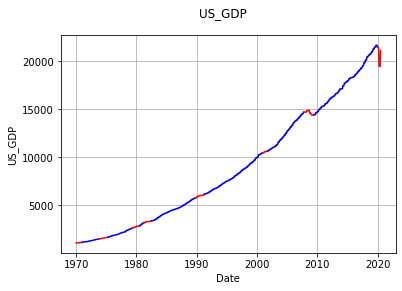

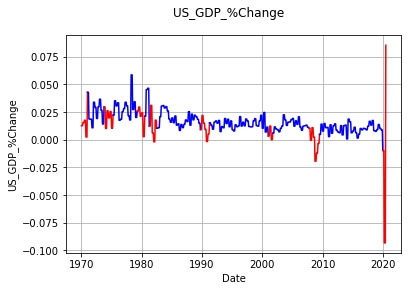

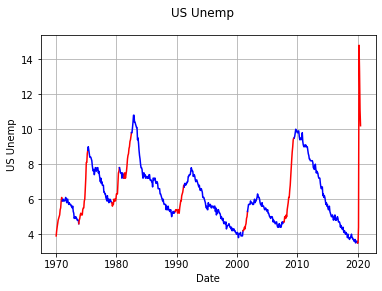

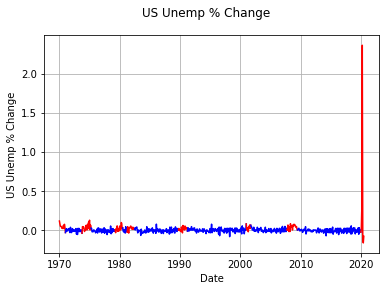

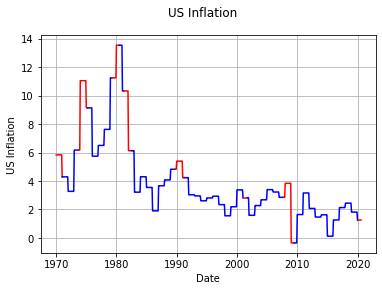

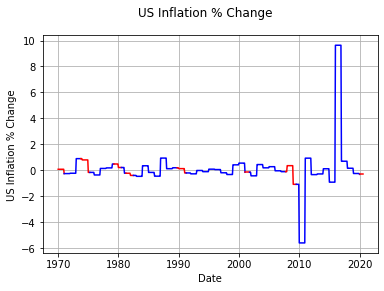

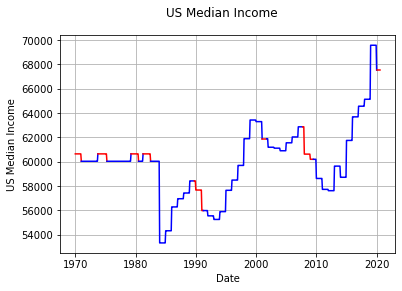

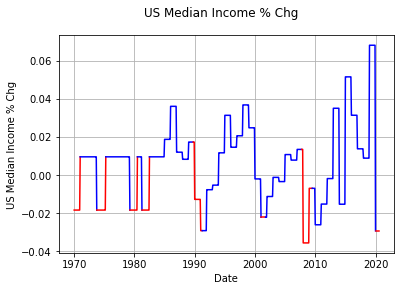

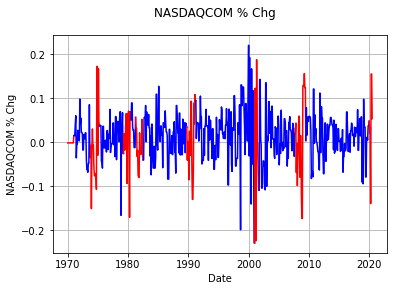

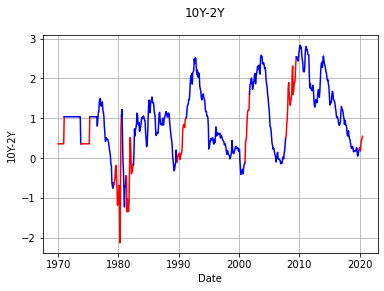

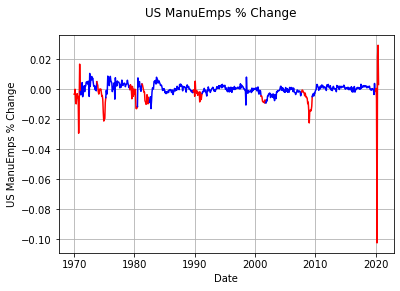

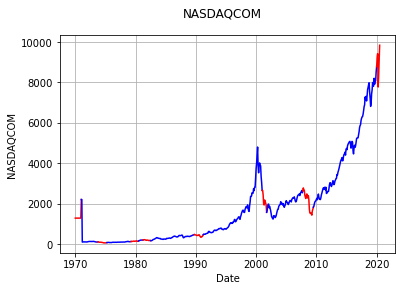

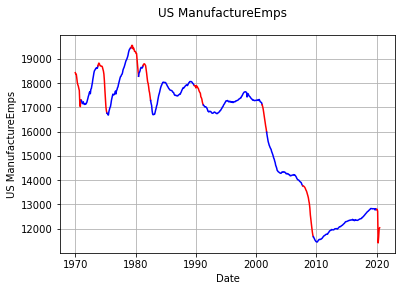

In [216]:
import numpy
from matplotlib import pyplot as plt

for column in df_merged.columns[1:]:
    fig = plt.figure()
    fig.suptitle(column)
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.grid()
    x=[]
    y=[]
    r=0
    for date, row in df_merged.iterrows():
        x.append(date.to_pydatetime())
        y.append(row[column])
        if r != row['is_recession']:
            if row['is_recession'] == 0:
                r=0
                plt.plot(x, y, 'r')
            else:
                r=1
                plt.plot(x, y, 'b')
            x=[date.to_pydatetime()]
            y=[row[column]]
    plt.show()

Index(['is_recession', 'US_GDP', 'US_GDP_%Change', 'US Unemp',
       'US Unemp % Change', 'US Inflation', 'US Inflation % Change',
       'US Median Income', 'US Median Income % Chg', 'NASDAQCOM % Chg',
       '10Y-2Y', 'US ManuEmps % Change', 'NASDAQCOM', 'US ManufactureEmps'],
      dtype='object')


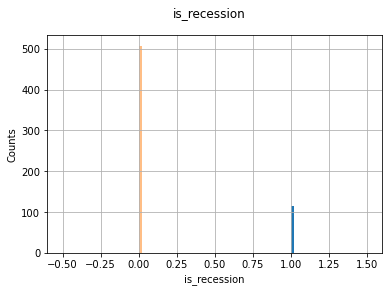

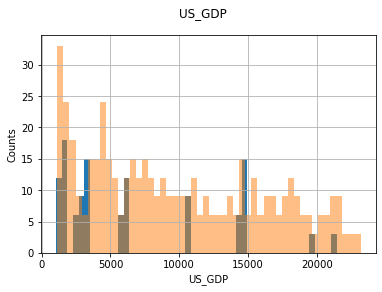

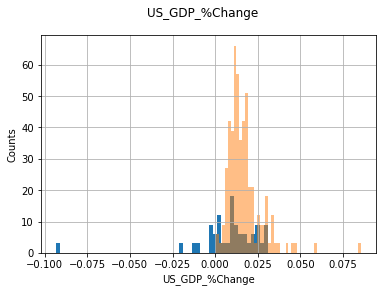

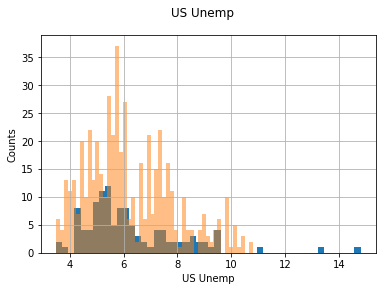

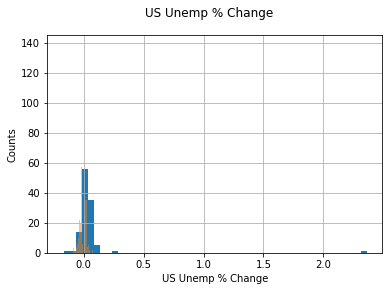

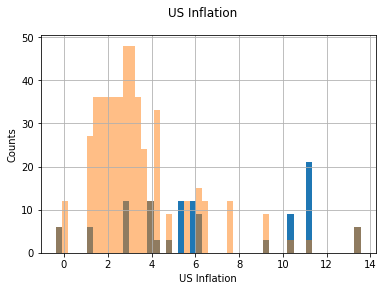

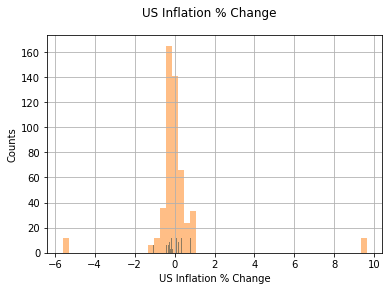

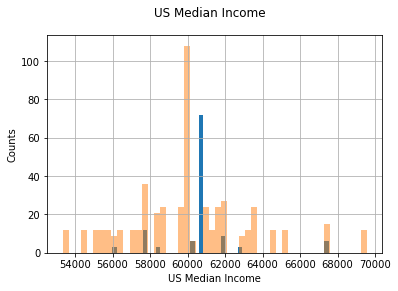

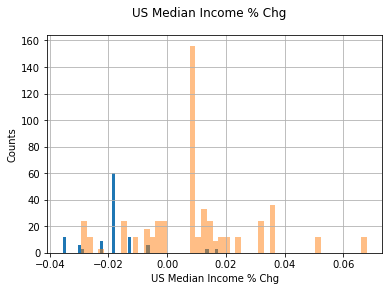

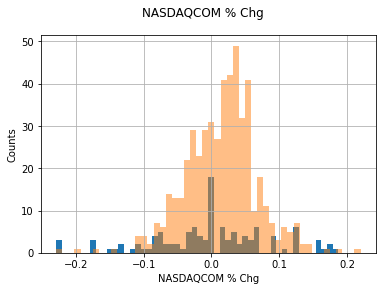

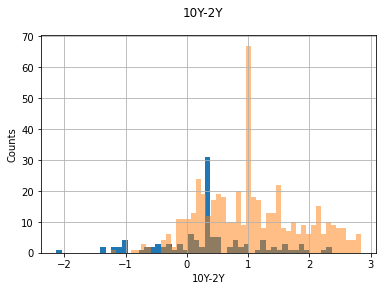

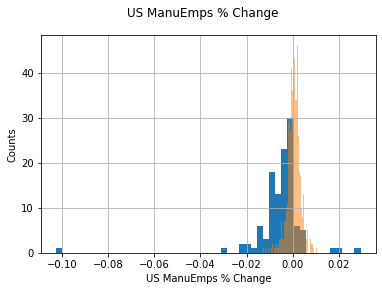

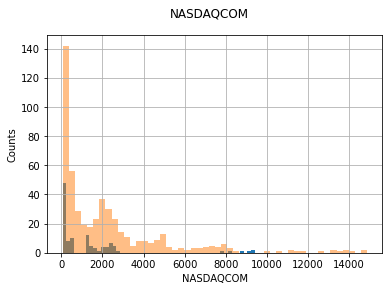

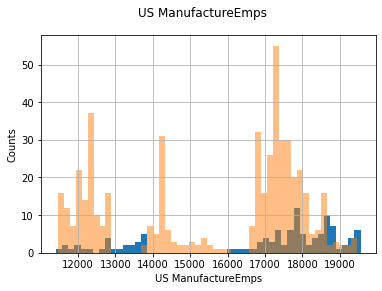

In [217]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

print(df_merged.columns)
for column in df_merged.columns:
    fig = plt.figure()
    fig.suptitle(column)
    plt.xlabel(column)
    plt.ylabel("Counts")
    df_merged.query('is_recession==1')[column].hist(bins=50)
    df_merged.query('is_recession==0')[column].hist(bins=50, alpha=0.5)
#     plt.legend(['1', '0'])
    plt.show()

<AxesSubplot:>

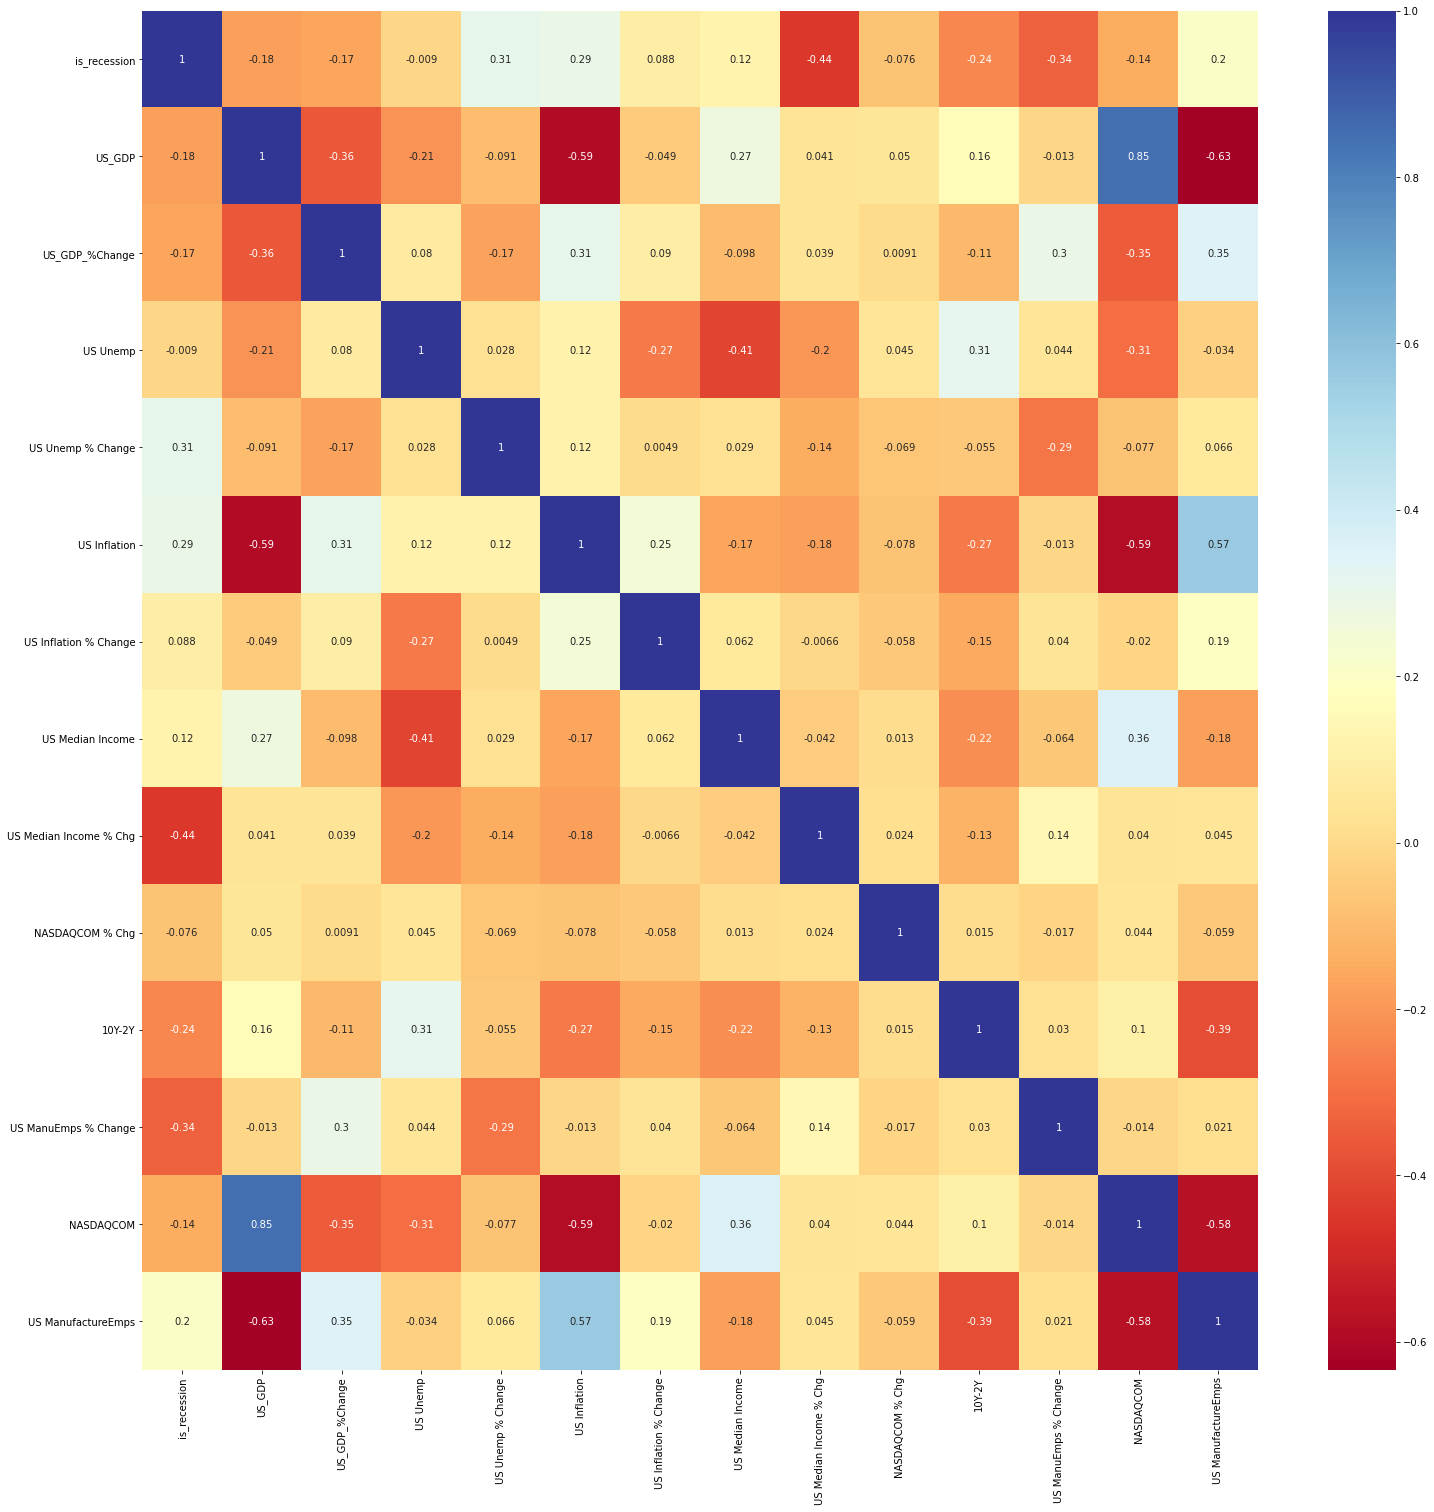

In [218]:
corr = df_merged.corr(method='kendall')
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

In [219]:
percent_chg_col = {'US_GDP_%Change', 'US Unemp % Change', 'US Inflation % Change', 
                'NASDAQCOM % Chg', 'US ManuEmps % Change', 'US Median Income % Chg'}
num_col = {'US_GDP', 'US Unemp', 'US Inflation', 'US Median Income', '10Y-2Y', 'US ManufactureEmps', 'NASDAQCOM'}
macro_col = {'US_GDP', 'US Unemp', 'US Inflation', '10Y-2Y', 'US ManufactureEmps', 'US_GDP_%Change', 
             'US Unemp % Change', 'US Inflation % Change', 'US ManuEmps % Change'}
micro_col = {'NASDAQCOM % Chg', 'US Median Income', 'US Median Income % Chg', 'NASDAQCOM'}
target = {'is_recession'}

# Micro: Percent & Raw

In [220]:
micro_pct = df_merged[list(micro_col - num_col)]
micro_raw = df_merged[list(micro_col - percent_chg_col)]
micro_pct.columns, micro_raw.columns
micro_pct.to_csv('microPct.csv')


# Macro: Percent & Raw

In [221]:
macro_pct = df_merged[list(macro_col - num_col)]
macro_raw = df_merged[list(macro_col - percent_chg_col)]
macro_pct.columns, macro_raw.columns
macro_pct.to_csv('macroPct.csv')


# All: Percent & Raw

In [222]:
all_pct = df_merged[list(percent_chg_col)]
all_raw = df_merged[list(num_col)]
all_pct.columns, all_raw.columns
all_pct.to_csv('allPct.csv')


# All: ANOVA Selection

In [223]:
from sklearn.feature_selection import SelectKBest, f_classif

def get_k_best(X: pd.DataFrame, y: pd.DataFrame, k: int = 5) -> list:
    """ Takes in a data frame and reports the top K features """
    fit = SelectKBest(score_func=f_classif, k=k).fit(np.array(X), np.array(y).reshape(y.shape[0]))
    values = fit.transform(np.array(X))
    frozen = [frozenset(v) for v in values.T]
    labels = list(label for label, values in X.iteritems() if frozenset(values) in frozen)
    assert len(labels) == k
    return labels

anova_pct_feat = get_k_best(all_pct, df_merged[target])
anova_raw_feat = get_k_best(all_raw, df_merged[target])
anova_pct_feat, anova_raw_feat




(['US_GDP_%Change',
  'US Unemp % Change',
  'US ManuEmps % Change',
  'US Median Income % Chg',
  'NASDAQCOM % Chg'],
 ['10Y-2Y', 'US_GDP', 'US Inflation', 'NASDAQCOM', 'US ManufactureEmps'])

In [224]:
anova_pct = all_pct[anova_pct_feat]
anova_pct
anova_pct.to_csv('anovaPct.csv')

In [225]:
anova_raw = all_raw[anova_raw_feat]
anova_raw



,10Y-2Y,US_GDP,US Inflation,NASDAQCOM,US ManufactureEmps
1970-01-01,0.355958,1051.200,5.838255,1286.039078,18424.0
1970-02-01,0.355958,1051.200,5.838255,1286.039078,18361.0
1970-03-01,0.355958,1051.200,5.838255,1286.039078,18360.0
1970-04-01,0.355958,1067.375,5.838255,1286.039078,18207.0
1970-05-01,0.355958,1067.375,5.838255,1286.039078,18029.0
...,...,...,...,...,...
2021-05-01,1.471818,22740.959,1.233584,13900.438095,12300.0
2021-06-01,1.466000,22740.959,1.233584,13517.682500,12332.0
2021-07-01,1.316364,23187.042,1.233584,14097.169091,12389.0
2021-08-01,1.099048,23187.042,1.233584,14639.072857,12438.0


# All: PCA

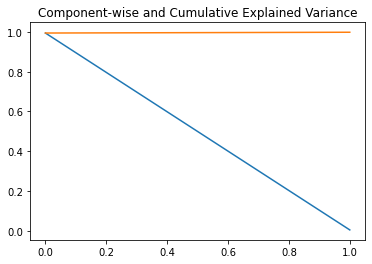

In [226]:
from sklearn.decomposition import PCA

def get_n_components(X: pd.DataFrame, n: int = 5) -> np.ndarray:
    pca = PCA(n_components=n)
    pca_result = pca.fit_transform(X.values)
    plt.plot(range(n), pca.explained_variance_ratio_)
    plt.plot(range(n), np.cumsum(pca.explained_variance_ratio_))
    plt.title("Component-wise and Cumulative Explained Variance")
    plt.show()
    return pca_result

pca_pct = get_n_components(all_pct, n = 2)
pca_pct

pd.DataFrame(pca_pct).to_csv('pcaPct.csv')

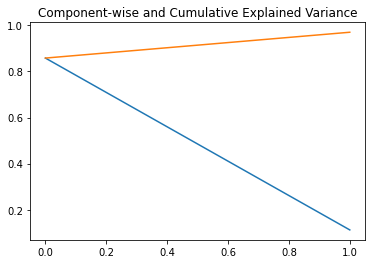

array([[-7878.56388722,  3290.94667805],
       [-7859.47237539,  3275.26437767],
       [-7859.16934449,  3275.01540864],
       ...,
       [18841.80746473,  4608.48812579],
       [18998.80566692,  4755.53577216],
       [19058.97309371,  4816.86483253]])

In [227]:
pca_raw = get_n_components(all_raw, n = 2)
pca_raw



In [228]:
len(pca_raw)

621

# All: Corr Selection

array(['US Median Income % Chg', 'US ManuEmps % Change',
       'US Unemp % Change', 'US_GDP_%Change', 'US Inflation % Change'],
      dtype=object)

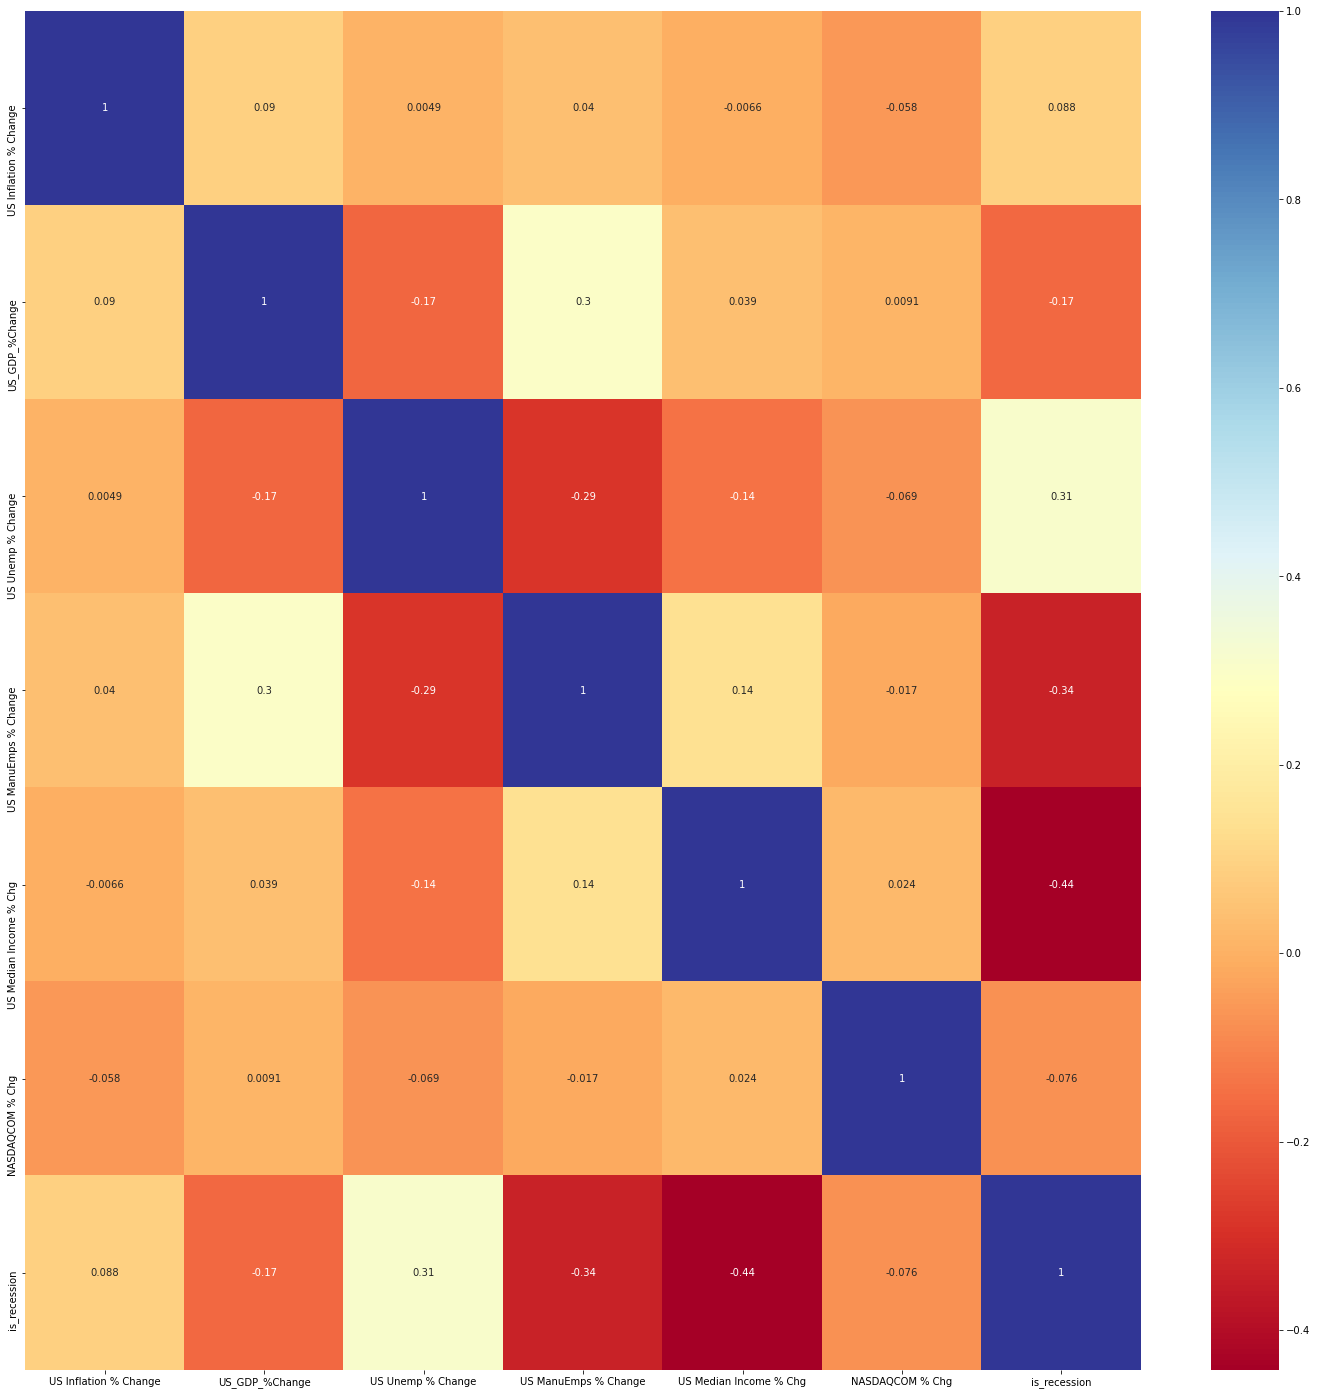

In [229]:
def get_k_corr(df: pd.DataFrame, y: pd.DataFrame, col: str, k: int = 5) -> None:
    """ Plots the correlation matrix and returns the theoretically highest values for the target """
    df = pd.merge(df,df_merged[target],left_index=True,right_index=True,how='inner')
    corr = df.corr(method='kendall')
    ktau_cols = np.array(corr[col].abs().sort_values(ascending=False)[1:51].index)
    plt.figure(figsize=(25,25))
    sns.heatmap(corr, annot=True, cmap="RdYlBu")
    return ktau_cols[:k]

corr_pct_feats = get_k_corr(all_pct, df_merged[target], 'is_recession')
corr_pct_feats

array(['US Inflation', '10Y-2Y', 'US ManufactureEmps', 'US_GDP',
       'NASDAQCOM'], dtype=object)

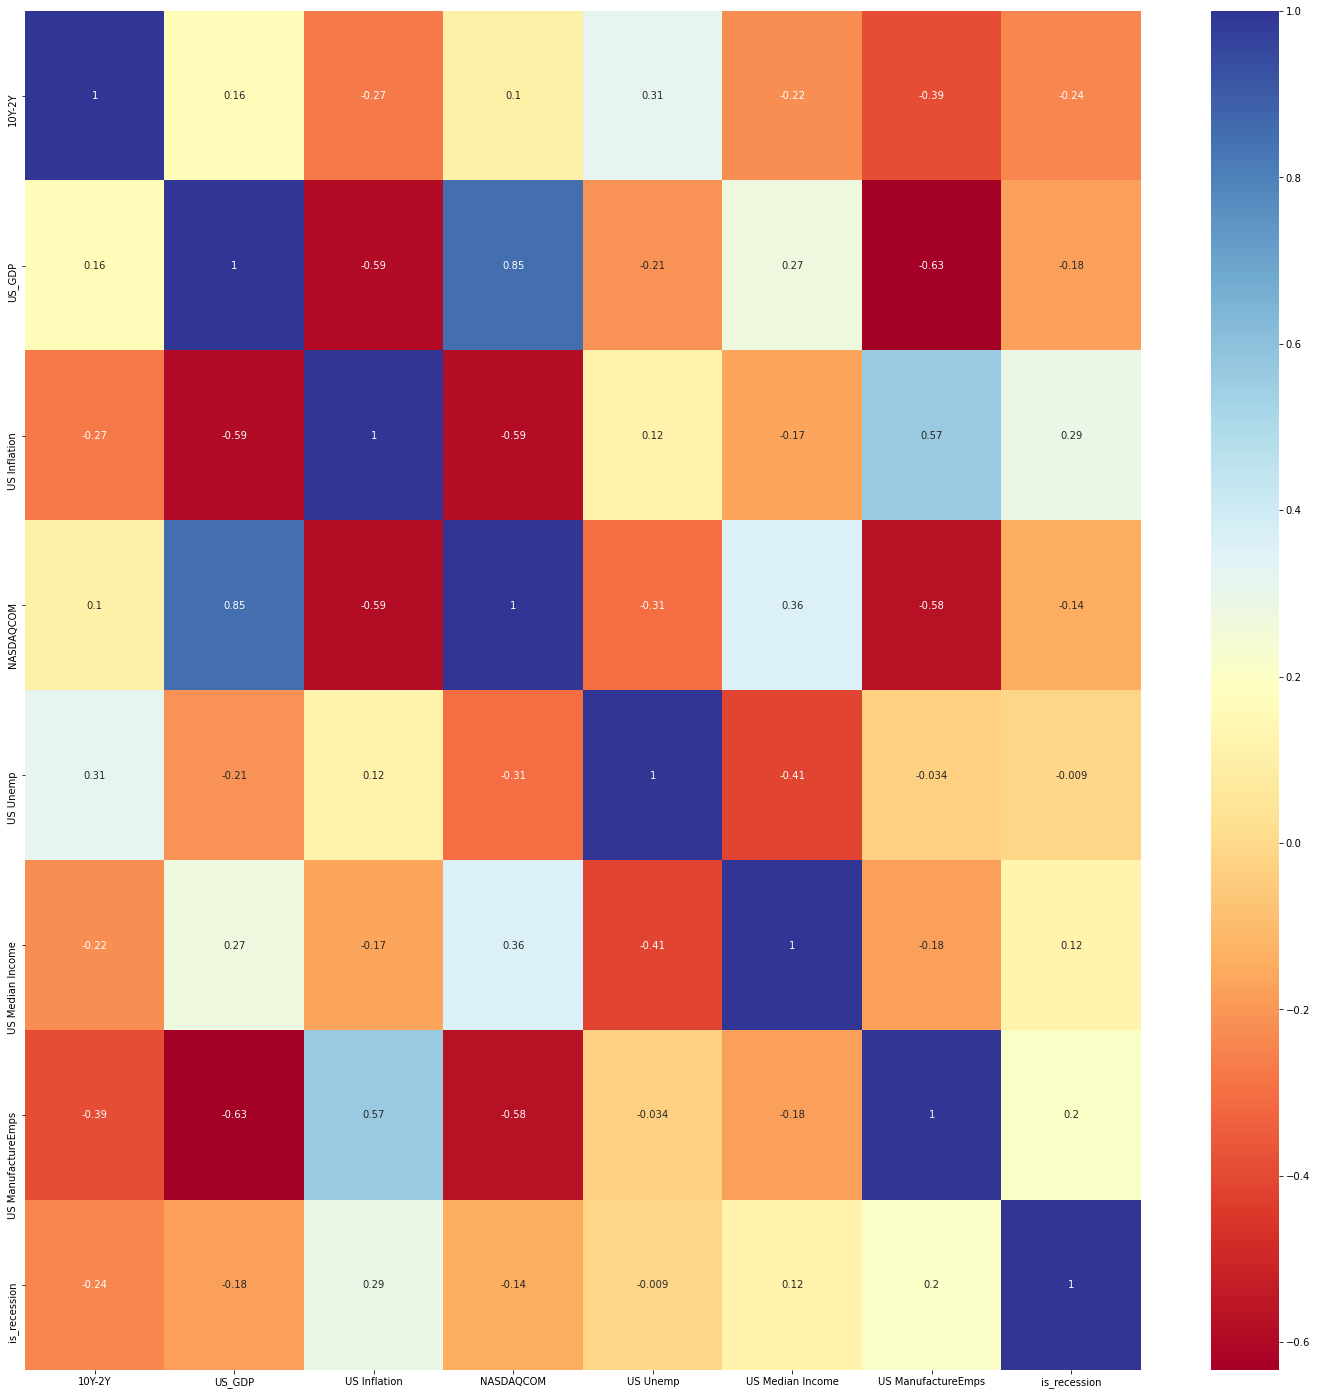

In [230]:
corr_raw_feats = get_k_corr(all_raw, df_merged[target], 'is_recession')
corr_raw_feats



In [231]:
corr_raw = df_merged[corr_raw_feats]
corr_raw

,US Inflation,10Y-2Y,US ManufactureEmps,US_GDP,NASDAQCOM
1970-01-01,5.838255,0.355958,18424.0,1051.200,1286.039078
1970-02-01,5.838255,0.355958,18361.0,1051.200,1286.039078
1970-03-01,5.838255,0.355958,18360.0,1051.200,1286.039078
1970-04-01,5.838255,0.355958,18207.0,1067.375,1286.039078
1970-05-01,5.838255,0.355958,18029.0,1067.375,1286.039078
...,...,...,...,...,...
2021-05-01,1.233584,1.471818,12300.0,22740.959,13900.438095
2021-06-01,1.233584,1.466000,12332.0,22740.959,13517.682500
2021-07-01,1.233584,1.316364,12389.0,23187.042,14097.169091
2021-08-01,1.233584,1.099048,12438.0,23187.042,14639.072857


In [232]:
corr_pct = df_merged[corr_pct_feats]
corr_pct

corr_pct.to_csv('corrPct.csv')

# Everything

In [233]:
everything = df_merged.drop(columns=target)
everything

everything.to_csv('everything.csv')

In [234]:
normalized_dfs = [micro_raw, macro_raw, all_raw, corr_raw, anova_raw]

In [235]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
micro_raw = scaler.fit_transform(micro_raw)
macro_raw = scaler.fit_transform(macro_raw)
all_raw = scaler.fit_transform(all_raw)
corr_raw = scaler.fit_transform(corr_raw)
anova_raw = scaler.fit_transform(anova_raw)

pd.DataFrame(corr_raw).to_csv('corrRaw.csv')
pd.DataFrame(pca_raw).to_csv('pcaRaw.csv')
pd.DataFrame(anova_raw).to_csv('anovaRaw.csv')
pd.DataFrame(all_raw).to_csv('allRaw.csv')
pd.DataFrame(macro_raw).to_csv('macroRaw.csv')
pd.DataFrame(micro_raw).to_csv('microRaw.csv')

In [236]:
all_models = [(micro_pct, 'Micro Pct'), (micro_raw, 'Micro Raw'), (macro_pct, 'Macro Pct'), 
              (macro_raw, 'Macro Raw'), (all_pct, 'All Pct'), (all_raw, 'All Raw'), (anova_pct, 'ANOVA Pct'), 
              (anova_raw, 'ANOVA Raw'), (pca_raw, 'PCA Raw'), (pca_pct, 'PCA Pct'), 
              (corr_pct, 'Corr Pct'), (corr_raw, 'Corr Raw')]
len(all_models)

model_scores_data = [["Model", "Training Percent", "Data Subset", "Feature Selection Method", "True Positive", "False Positive", "True Negative", "False Negative", "Cross Validation Mean", "Cross Validation STD", "Test Accuracy", "Time"]]

# Models

In [237]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split

## y will be target variable
y = np.array(df_merged[target])
y = y.reshape(y.shape[0])

performancelr = []
accuracylr = []
train_scorelr = []
test_scorelr = []

performancerf = []
accuracyrf = []
train_scorerf = []
test_scorerf = []

all_train_test=[]
for model, name in all_models:
    # Splits data into training and testing sets
    all_train_test.append(train_test_split(np.array(model), y, test_size=0.2, random_state=5)+[name])
    all_train_test.append(train_test_split(np.array(model), y, test_size=0.4, random_state=5)+[name])
    all_train_test.append(train_test_split(np.array(model), y, test_size=0.6, random_state=5)+[name])
    all_train_test.append(train_test_split(np.array(model), y, test_size=0.8, random_state=5)+[name])
# Splits the data in 10, such that each fold has the same class distribution of the whole data set, and repeats 3 times.
cross=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

**Logistic Regression Models**

Training on 80% of data
Score for Micro Pct model is 0.8144081632653061 (0.030669542748834742) for cross validated training data.
Score for Micro Pct model is 0.792 for test data.
Accuracy of 24 true recessions: 0.2916666666666667


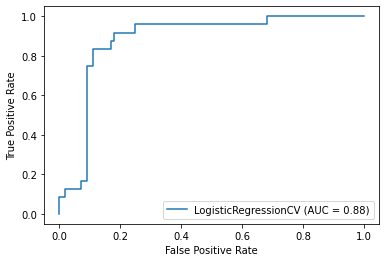

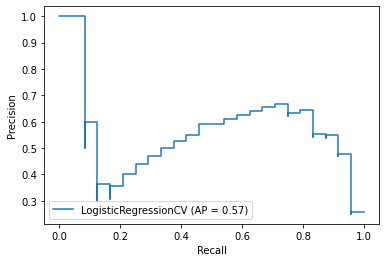

Training on 60% of data
Score for Micro Pct model is 0.8082740635372214 (0.028040374544530604) for cross validated training data.
Score for Micro Pct model is 0.8313253012048193 for test data.
Accuracy of 48 true recessions: 0.1875


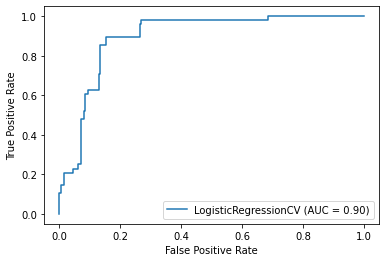

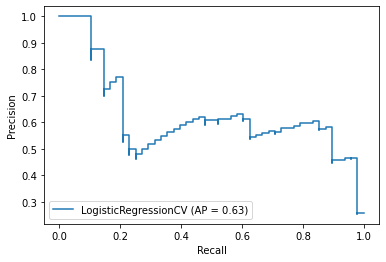

Training on 40% of data
Score for Micro Pct model is 0.8319444444444444 (0.05541273308233696) for cross validated training data.
Score for Micro Pct model is 0.8123324396782842 for test data.
Accuracy of 69 true recessions: 0.2898550724637681


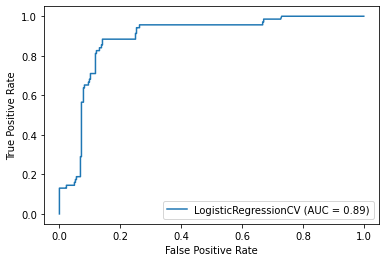

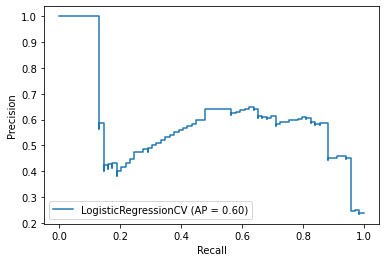

Training on 20% of data
Score for Micro Pct model is 0.8572649572649572 (0.06258750904925965) for cross validated training data.
Score for Micro Pct model is 0.8269617706237424 for test data.
Accuracy of 93 true recessions: 0.40860215053763443


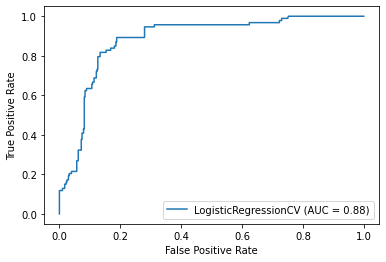

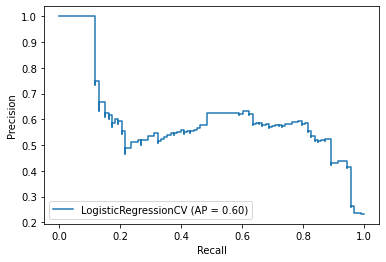

Training on 80% of data
Score for Micro Raw model is 0.8185306122448978 (0.0017996251171467918) for cross validated training data.
Score for Micro Raw model is 0.808 for test data.
Accuracy of 24 true recessions: 0.0


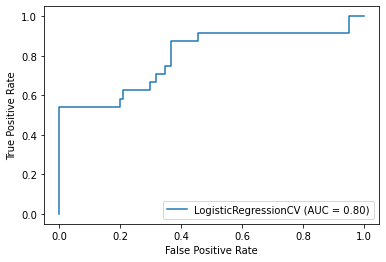

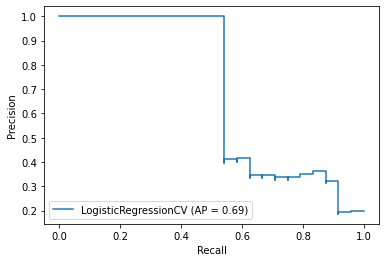

Training on 60% of data
Score for Micro Raw model is 0.8226173541963016 (0.01255973829567231) for cross validated training data.
Score for Micro Raw model is 0.8072289156626506 for test data.
Accuracy of 48 true recessions: 0.0


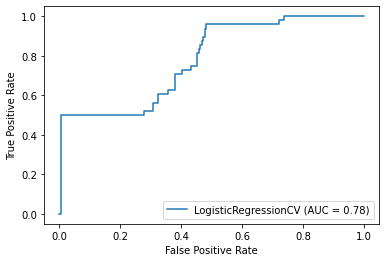

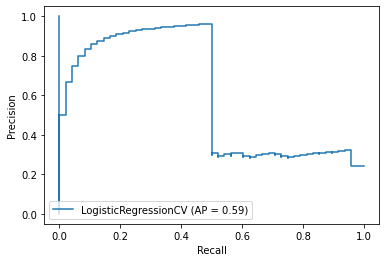

Training on 40% of data
Score for Micro Raw model is 0.8186666666666668 (0.01880898130622115) for cross validated training data.
Score for Micro Raw model is 0.8150134048257373 for test data.
Accuracy of 69 true recessions: 0.0


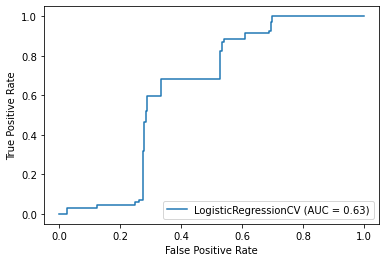

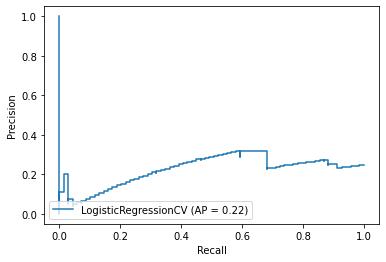

Training on 20% of data
Score for Micro Raw model is 0.8307692307692306 (0.02129903554594377) for cross validated training data.
Score for Micro Raw model is 0.8128772635814889 for test data.
Accuracy of 93 true recessions: 0.0


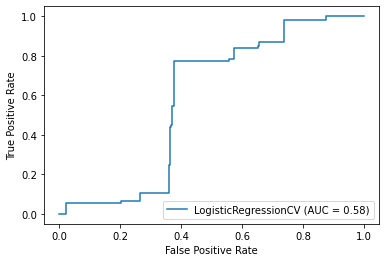

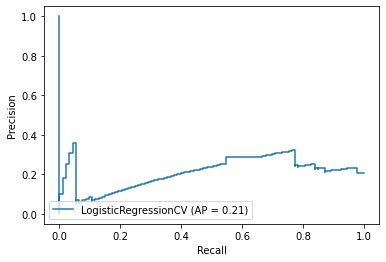

Training on 80% of data
Score for Macro Pct model is 0.8809387755102042 (0.04016710202347934) for cross validated training data.
Score for Macro Pct model is 0.848 for test data.
Accuracy of 24 true recessions: 0.25


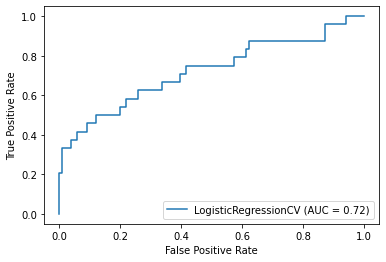

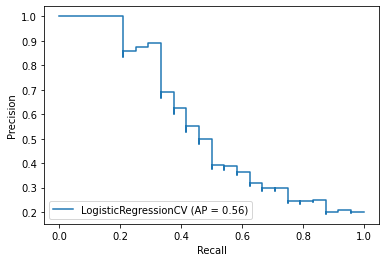

Training on 60% of data
Score for Macro Pct model is 0.8781887150308203 (0.03639374753621612) for cross validated training data.
Score for Macro Pct model is 0.8714859437751004 for test data.
Accuracy of 48 true recessions: 0.3958333333333333


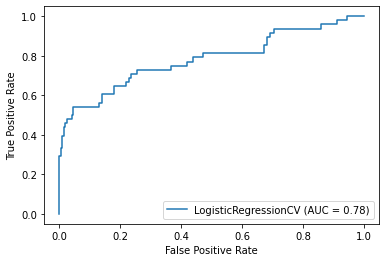

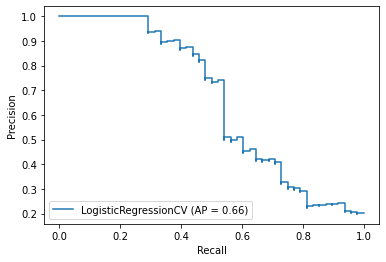

Training on 40% of data
Score for Macro Pct model is 0.8858333333333334 (0.035851416625763535) for cross validated training data.
Score for Macro Pct model is 0.868632707774799 for test data.
Accuracy of 69 true recessions: 0.391304347826087


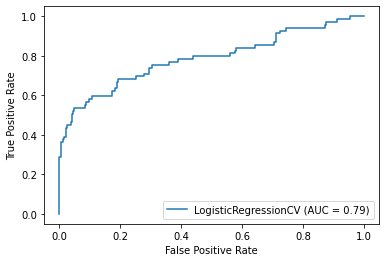

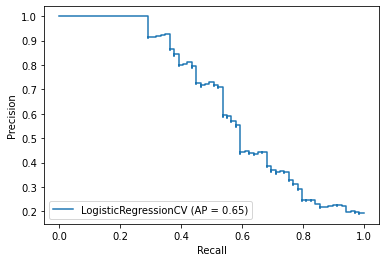

Training on 20% of data
Score for Macro Pct model is 0.8925213675213678 (0.059920945923704796) for cross validated training data.
Score for Macro Pct model is 0.8611670020120724 for test data.
Accuracy of 93 true recessions: 0.41935483870967744


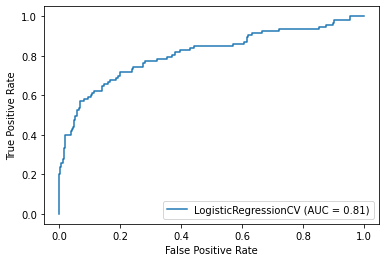

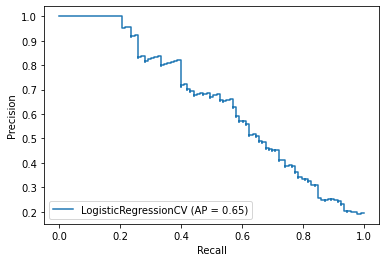

Training on 80% of data
Score for Macro Raw model is 0.8540816326530613 (0.03627340761437159) for cross validated training data.
Score for Macro Raw model is 0.88 for test data.
Accuracy of 24 true recessions: 0.5


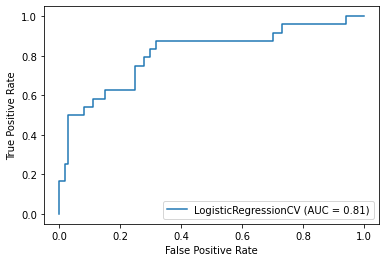

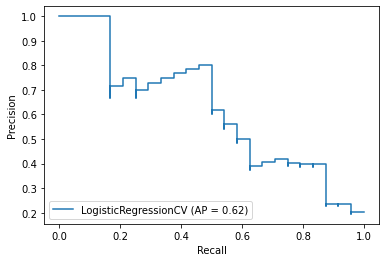

Training on 60% of data
Score for Macro Raw model is 0.8603129445234708 (0.032430976650381686) for cross validated training data.
Score for Macro Raw model is 0.8473895582329317 for test data.
Accuracy of 48 true recessions: 0.375


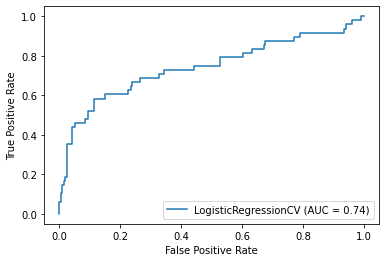

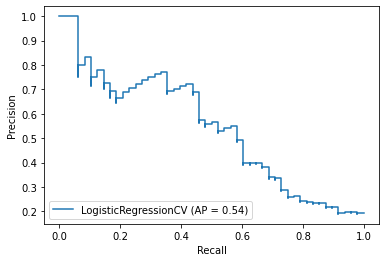

Training on 40% of data
Score for Macro Raw model is 0.833388888888889 (0.03950031254759922) for cross validated training data.
Score for Macro Raw model is 0.839142091152815 for test data.
Accuracy of 69 true recessions: 0.2463768115942029


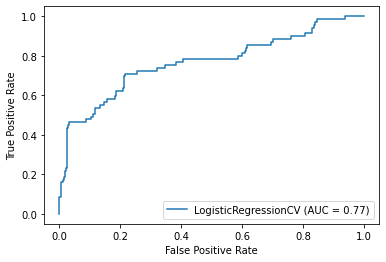

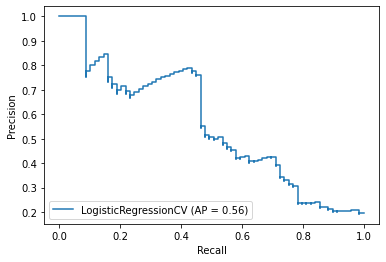

Training on 20% of data
Score for Macro Raw model is 0.8228632478632477 (0.04042303603584441) for cross validated training data.
Score for Macro Raw model is 0.8309859154929577 for test data.
Accuracy of 93 true recessions: 0.1827956989247312


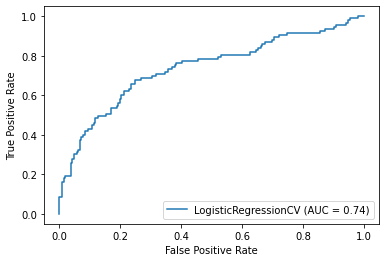

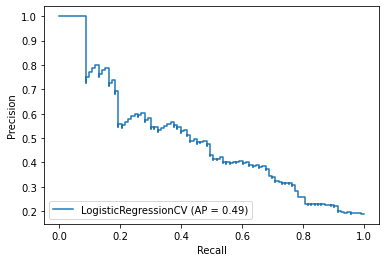

Training on 80% of data
Score for All Pct model is 0.9126122448979592 (0.03316827382378011) for cross validated training data.
Score for All Pct model is 0.888 for test data.
Accuracy of 24 true recessions: 0.5416666666666666


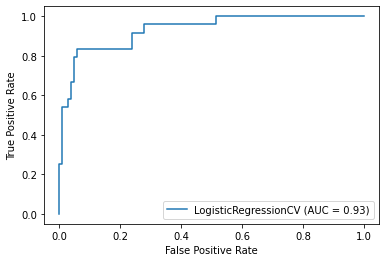

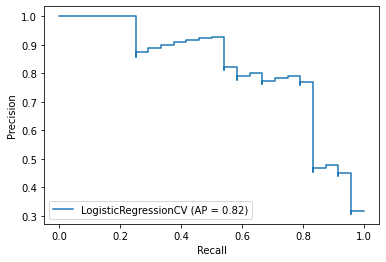

Training on 60% of data
Score for All Pct model is 0.9024656235182552 (0.040211341463615505) for cross validated training data.
Score for All Pct model is 0.9036144578313253 for test data.
Accuracy of 48 true recessions: 0.5416666666666666


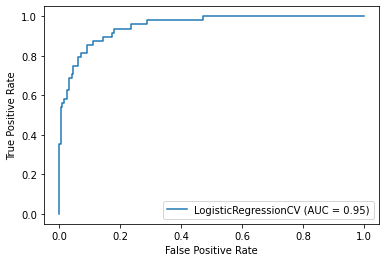

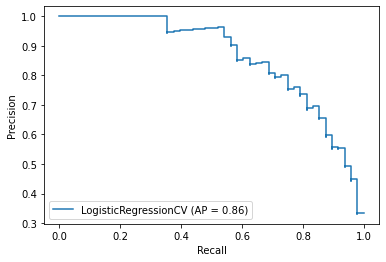

Training on 40% of data
Score for All Pct model is 0.9007777777777779 (0.04202013039038185) for cross validated training data.
Score for All Pct model is 0.8981233243967829 for test data.
Accuracy of 69 true recessions: 0.5217391304347826


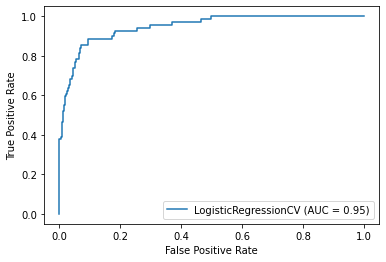

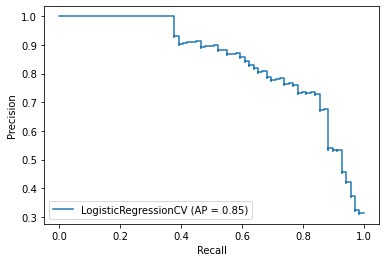

Training on 20% of data
Score for All Pct model is 0.8982905982905984 (0.07133808697480763) for cross validated training data.
Score for All Pct model is 0.903420523138833 for test data.
Accuracy of 93 true recessions: 0.5806451612903226


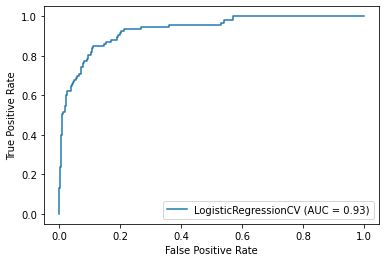

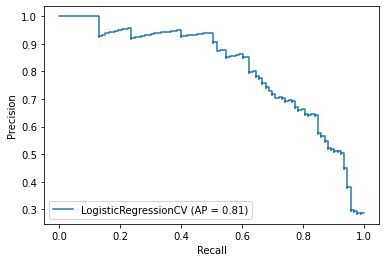

Training on 80% of data
Score for All Raw model is 0.8554149659863945 (0.034972817565061536) for cross validated training data.
Score for All Raw model is 0.88 for test data.
Accuracy of 24 true recessions: 0.5


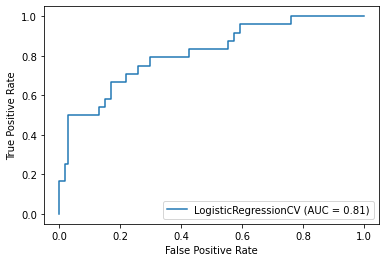

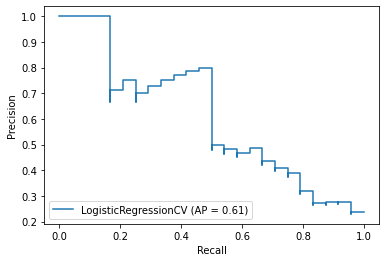

Training on 60% of data
Score for All Raw model is 0.8594357515410146 (0.033256970780042534) for cross validated training data.
Score for All Raw model is 0.8514056224899599 for test data.
Accuracy of 48 true recessions: 0.3958333333333333


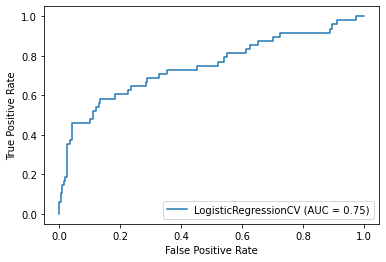

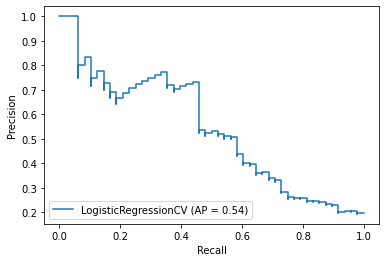

Training on 40% of data
Score for All Raw model is 0.8348333333333334 (0.04514862288207856) for cross validated training data.
Score for All Raw model is 0.839142091152815 for test data.
Accuracy of 69 true recessions: 0.2463768115942029


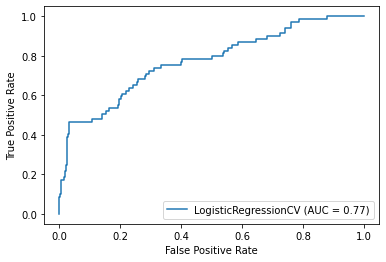

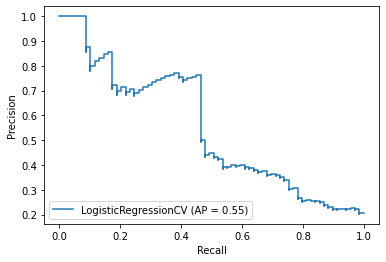

Training on 20% of data
Score for All Raw model is 0.8256410256410255 (0.043771616556330384) for cross validated training data.
Score for All Raw model is 0.8350100603621731 for test data.
Accuracy of 93 true recessions: 0.1935483870967742


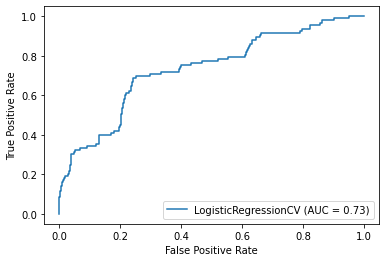

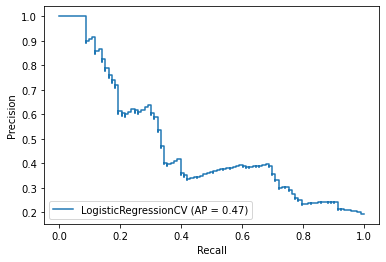

Training on 80% of data
Score for ANOVA Pct model is 0.8977959183673467 (0.03309792201994017) for cross validated training data.
Score for ANOVA Pct model is 0.896 for test data.
Accuracy of 24 true recessions: 0.5416666666666666


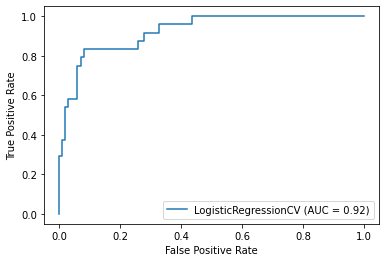

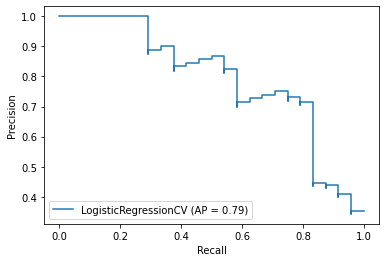

Training on 60% of data
Score for ANOVA Pct model is 0.8844713134186819 (0.03516741075160112) for cross validated training data.
Score for ANOVA Pct model is 0.9036144578313253 for test data.
Accuracy of 48 true recessions: 0.5625


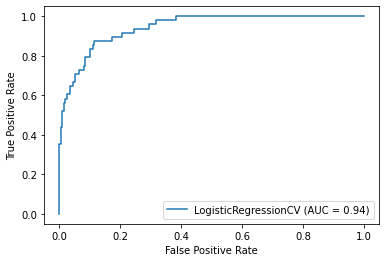

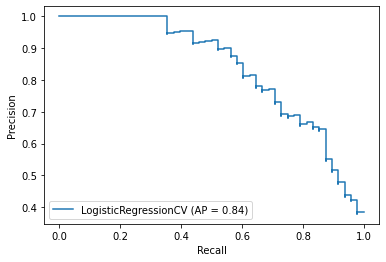

Training on 40% of data
Score for ANOVA Pct model is 0.8953333333333334 (0.04182724612640089) for cross validated training data.
Score for ANOVA Pct model is 0.8927613941018767 for test data.
Accuracy of 69 true recessions: 0.5362318840579711


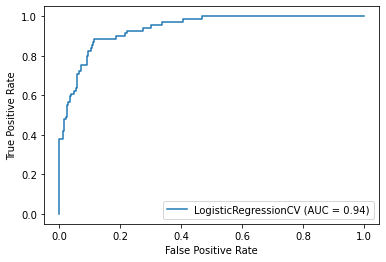

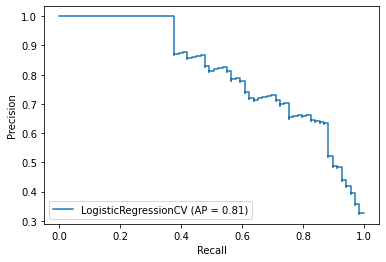

Training on 20% of data
Score for ANOVA Pct model is 0.9136752136752139 (0.06996158531840489) for cross validated training data.
Score for ANOVA Pct model is 0.8913480885311871 for test data.
Accuracy of 93 true recessions: 0.5698924731182796


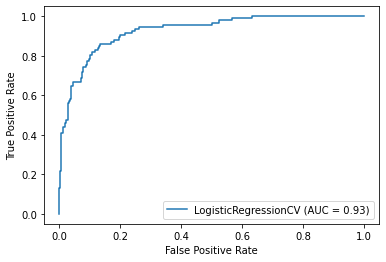

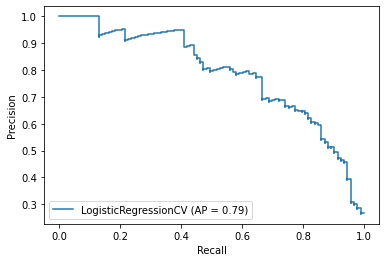

Training on 80% of data
Score for ANOVA Raw model is 0.8540952380952381 (0.03513947273807963) for cross validated training data.
Score for ANOVA Raw model is 0.864 for test data.
Accuracy of 24 true recessions: 0.4583333333333333


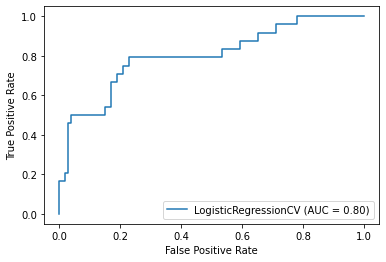

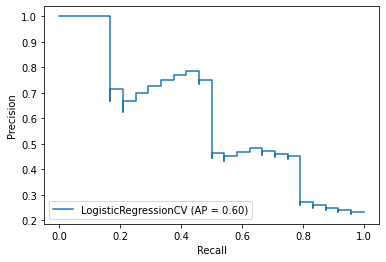

Training on 60% of data
Score for ANOVA Raw model is 0.8621621621621622 (0.035897139422156055) for cross validated training data.
Score for ANOVA Raw model is 0.8554216867469879 for test data.
Accuracy of 48 true recessions: 0.3958333333333333


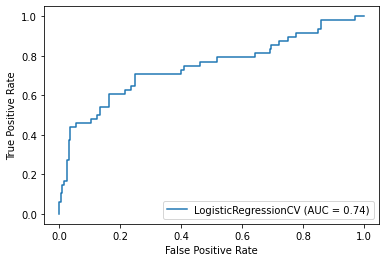

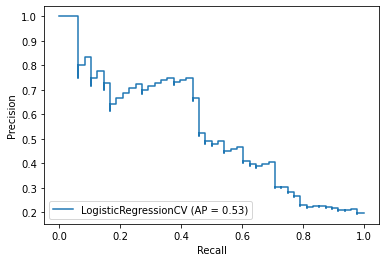

Training on 40% of data
Score for ANOVA Raw model is 0.8332777777777778 (0.03994784408342432) for cross validated training data.
Score for ANOVA Raw model is 0.839142091152815 for test data.
Accuracy of 69 true recessions: 0.2318840579710145


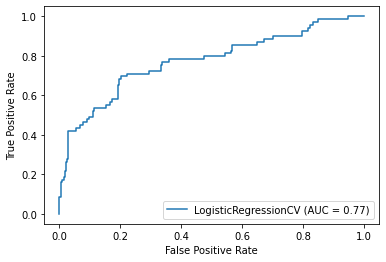

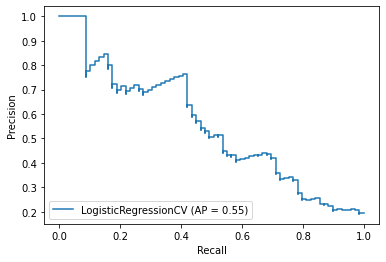

Training on 20% of data
Score for ANOVA Raw model is 0.8254273504273503 (0.044092231115763145) for cross validated training data.
Score for ANOVA Raw model is 0.8329979879275654 for test data.
Accuracy of 93 true recessions: 0.1935483870967742


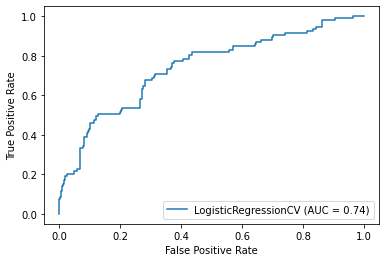

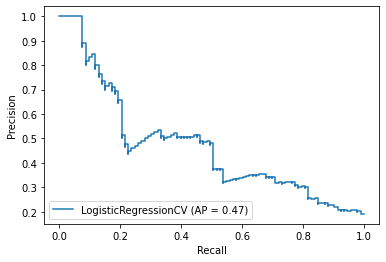

Training on 80% of data
Score for PCA Raw model is 0.8185306122448978 (0.0017996251171467918) for cross validated training data.
Score for PCA Raw model is 0.808 for test data.
Accuracy of 24 true recessions: 0.0


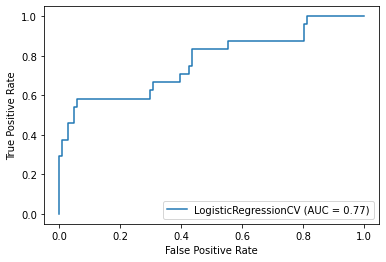

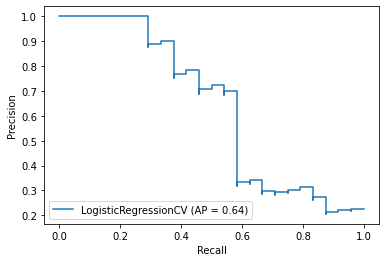

Training on 60% of data
Score for PCA Raw model is 0.8226173541963016 (0.01255973829567231) for cross validated training data.
Score for PCA Raw model is 0.8072289156626506 for test data.
Accuracy of 48 true recessions: 0.0


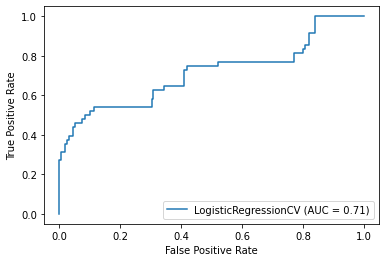

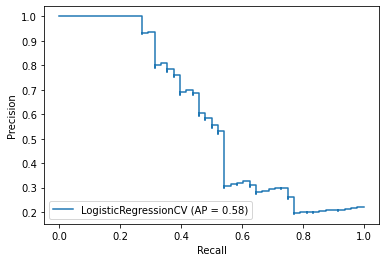

Training on 40% of data
Score for PCA Raw model is 0.8186666666666668 (0.01880898130622115) for cross validated training data.
Score for PCA Raw model is 0.8150134048257373 for test data.
Accuracy of 69 true recessions: 0.0


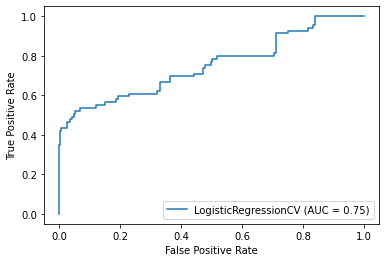

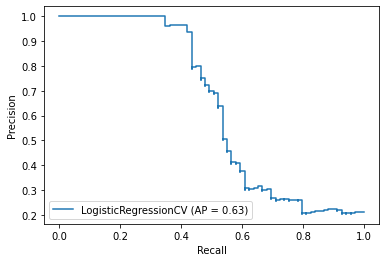

Training on 20% of data
Score for PCA Raw model is 0.8196581196581195 (0.04609841559029676) for cross validated training data.
Score for PCA Raw model is 0.8128772635814889 for test data.
Accuracy of 93 true recessions: 0.0


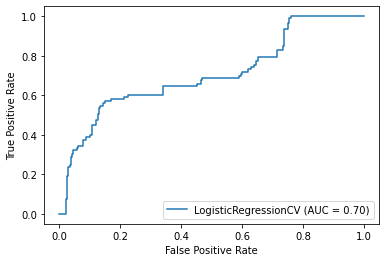

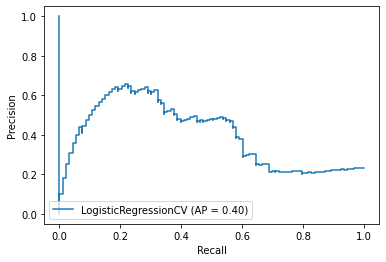

Training on 80% of data
Score for PCA Pct model is 0.8674965986394556 (0.02700249798623108) for cross validated training data.
Score for PCA Pct model is 0.848 for test data.
Accuracy of 24 true recessions: 0.25


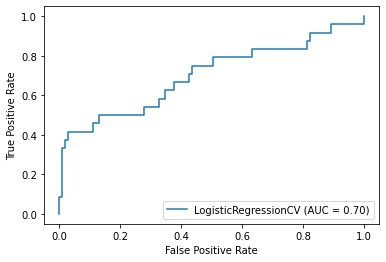

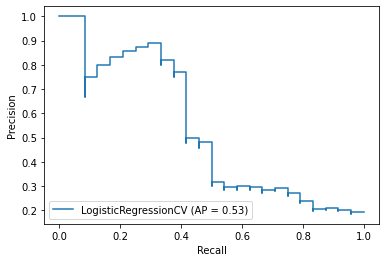

Training on 60% of data
Score for PCA Pct model is 0.8585111427216691 (0.03283727290636785) for cross validated training data.
Score for PCA Pct model is 0.8554216867469879 for test data.
Accuracy of 48 true recessions: 0.2708333333333333


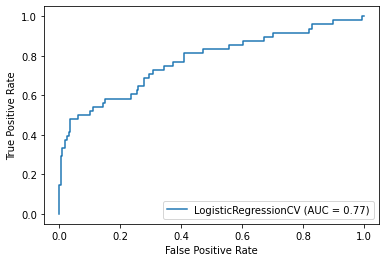

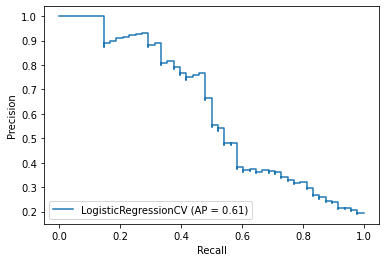

Training on 40% of data
Score for PCA Pct model is 0.836111111111111 (0.03542423666375715) for cross validated training data.
Score for PCA Pct model is 0.8471849865951743 for test data.
Accuracy of 69 true recessions: 0.18840579710144928


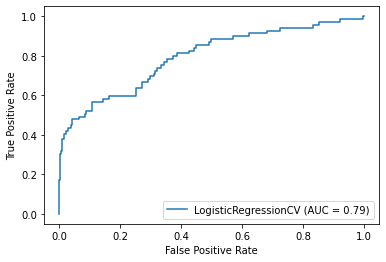

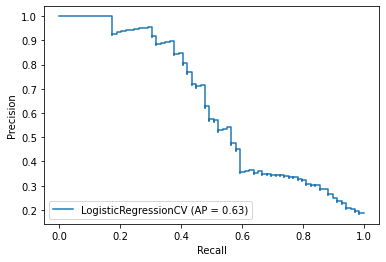

Training on 20% of data
Score for PCA Pct model is 0.8438034188034188 (0.0420831692386947) for cross validated training data.
Score for PCA Pct model is 0.8551307847082495 for test data.
Accuracy of 93 true recessions: 0.25806451612903225


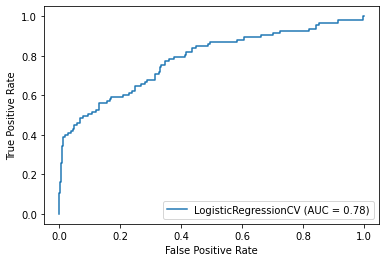

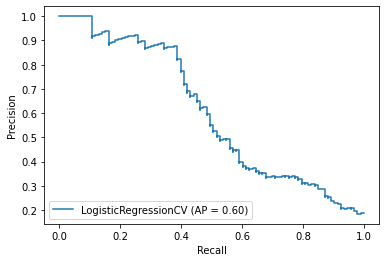

Training on 80% of data
Score for Corr Pct model is 0.9119183673469387 (0.03606161909935815) for cross validated training data.
Score for Corr Pct model is 0.904 for test data.
Accuracy of 24 true recessions: 0.5416666666666666


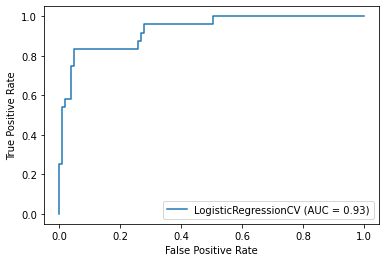

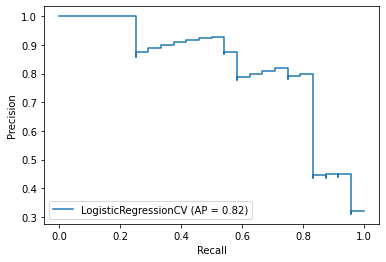

Training on 60% of data
Score for Corr Pct model is 0.9033191085822664 (0.039987296428899984) for cross validated training data.
Score for Corr Pct model is 0.9156626506024096 for test data.
Accuracy of 48 true recessions: 0.6041666666666666


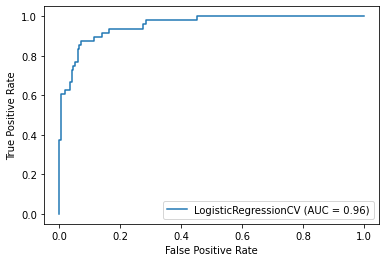

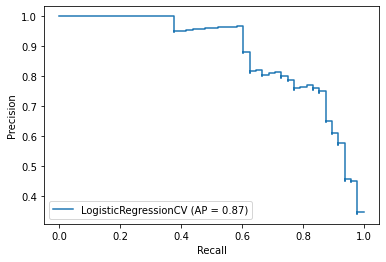

Training on 40% of data
Score for Corr Pct model is 0.9021111111111111 (0.0467814725381695) for cross validated training data.
Score for Corr Pct model is 0.9088471849865952 for test data.
Accuracy of 69 true recessions: 0.5942028985507246


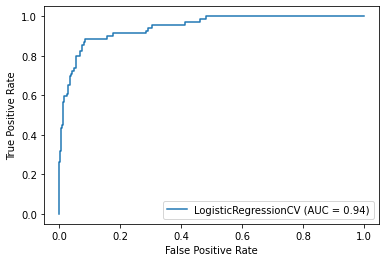

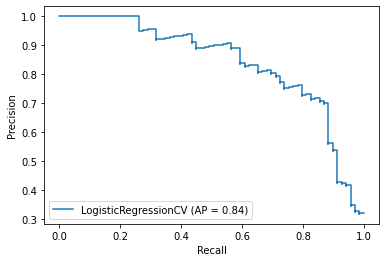

Training on 20% of data
Score for Corr Pct model is 0.9089743589743589 (0.07098520864653532) for cross validated training data.
Score for Corr Pct model is 0.89738430583501 for test data.
Accuracy of 93 true recessions: 0.5591397849462365


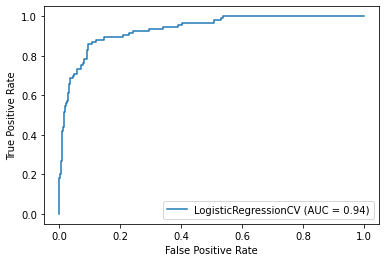

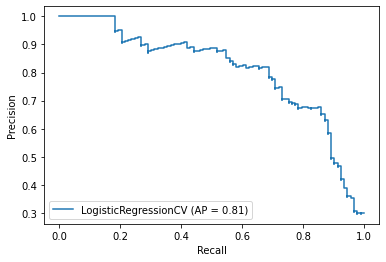

Training on 80% of data
Score for Corr Raw model is 0.8540952380952381 (0.03513947273807963) for cross validated training data.
Score for Corr Raw model is 0.864 for test data.
Accuracy of 24 true recessions: 0.4583333333333333


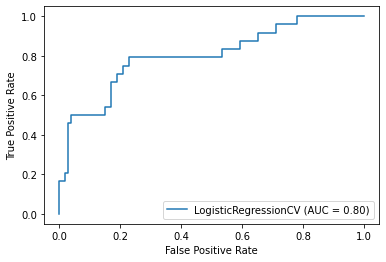

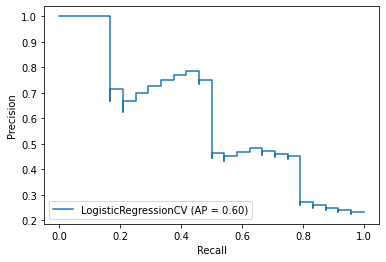

Training on 60% of data
Score for Corr Raw model is 0.8621621621621622 (0.035897139422156055) for cross validated training data.
Score for Corr Raw model is 0.8554216867469879 for test data.
Accuracy of 48 true recessions: 0.3958333333333333


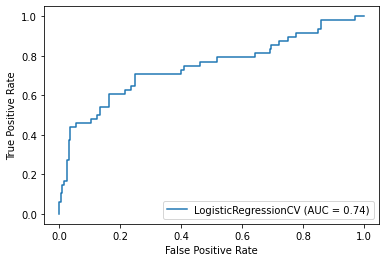

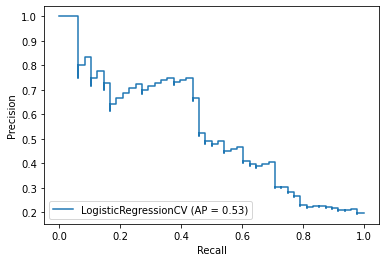

Training on 40% of data
Score for Corr Raw model is 0.8332777777777778 (0.03994784408342432) for cross validated training data.
Score for Corr Raw model is 0.839142091152815 for test data.
Accuracy of 69 true recessions: 0.2318840579710145


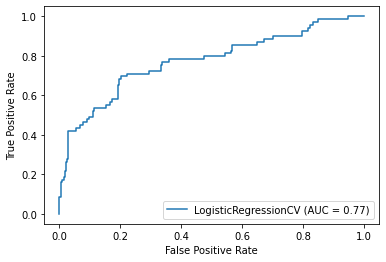

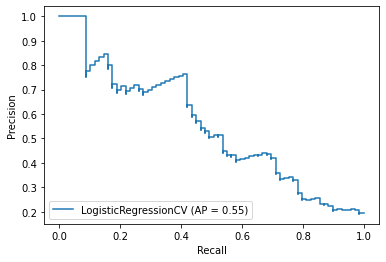

Training on 20% of data
Score for Corr Raw model is 0.8254273504273503 (0.044092231115763145) for cross validated training data.
Score for Corr Raw model is 0.8329979879275654 for test data.
Accuracy of 93 true recessions: 0.1935483870967742


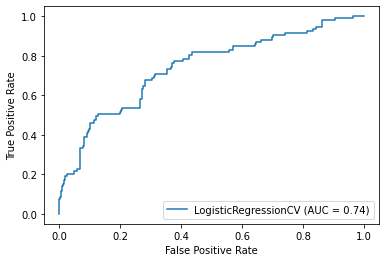

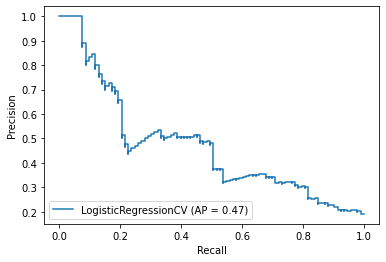

In [238]:
## Example PCA Usage
#### Notice that there is no need to convert it to a ndarray since it is already in that form
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
import time
import math
# No Hyperparameters to tune here
def logisticModels(X_train, X_test, y_train, y_test, name):
    
        
    total_size = X_train.size + X_test.size
    
    percent = math.ceil(X_train.size/total_size * 100)
    
    print(f'Training on {percent}% of data')
    
    start = time.time()
    lr = LogisticRegressionCV(max_iter=1000, fit_intercept=True, random_state=0)
    accuracy=cross_val_score(lr, X_train, y_train, scoring="accuracy", cv=cross)
    lr.fit(X_train, y_train)
    print(f'Score for {name} model is {np.mean(accuracy)} ({np.std(accuracy)}) for cross validated training data.')
    print(f'Score for {name} model is {lr.score(X_test, y_test)} for test data.')
    cm = confusion_matrix(y_test, lr.predict(X_test))
    correct = cm[1][1]
    total = correct + cm[1][0]
    acc = correct/total
    print(f'Accuracy of {total} true recessions: {acc}')
    plot_roc_curve(lr, X_test, y_test)
    plot_precision_recall_curve(lr, X_test, y_test)
    plt.show()
    data_sub, fsm = name.split()
    perf = time.time()-start
    performancelr.append(perf)
    accuracylr.append(acc)
    train_scorelr.append(np.mean(accuracy))
    test_scorelr.append(lr.score(X_test, y_test))
    
    model_scores_data.append(["Logistic Regression", percent, data_sub, fsm, cm[1][1], cm[0][1], cm[0][0], cm[1][0], np.mean(accuracy), np.std(accuracy), correct/total, perf])

for i in all_train_test:
    logisticModels(*i)

**Random Forest Models**

Training on 80% of data
Score for Micro Pct model is 0.9192789115646259 (0.03441160614683222) for cross validated training data.
Score for Micro Pct model is 0.936 for test data.
Accuracy of 24 true recessions predicted: 0.8333333333333334


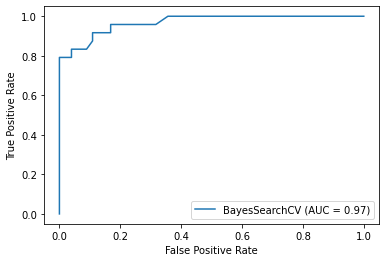

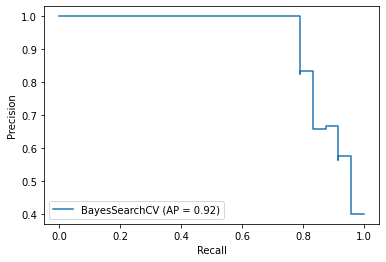

Training on 60% of data
Score for Micro Pct model is 0.9105263157894739 (0.0439102651560373) for cross validated training data.
Score for Micro Pct model is 0.927710843373494 for test data.
Accuracy of 48 true recessions predicted: 0.6875


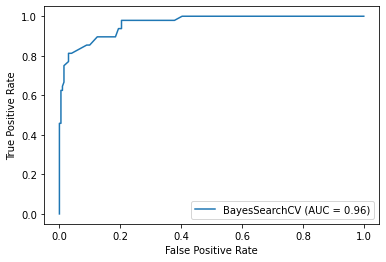

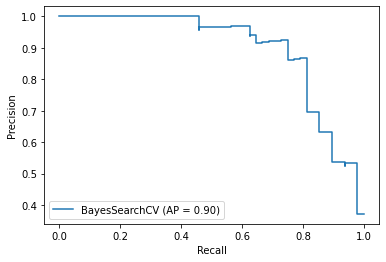

Training on 40% of data
Score for Micro Pct model is 0.8941111111111112 (0.04969114485039774) for cross validated training data.
Score for Micro Pct model is 0.9115281501340483 for test data.
Accuracy of 69 true recessions predicted: 0.8405797101449275


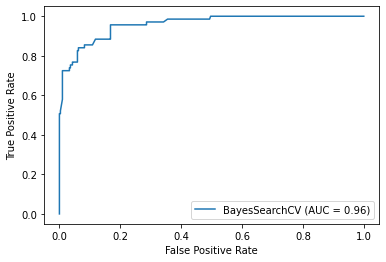

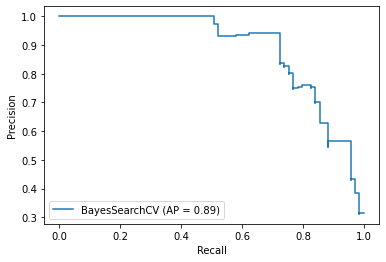

Training on 20% of data
Score for Micro Pct model is 0.9111111111111113 (0.07369905616945735) for cross validated training data.
Score for Micro Pct model is 0.8913480885311871 for test data.
Accuracy of 93 true recessions predicted: 0.5591397849462365


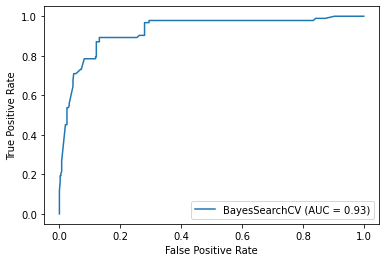

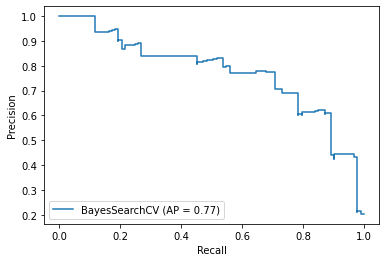

Training on 80% of data
Score for Micro Raw model is 0.9394965986394559 (0.022191393767237607) for cross validated training data.
Score for Micro Raw model is 0.928 for test data.
Accuracy of 24 true recessions predicted: 0.75


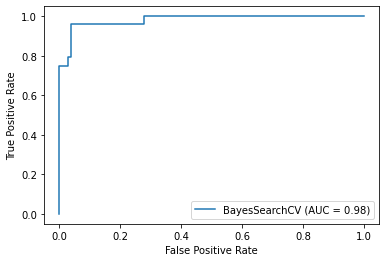

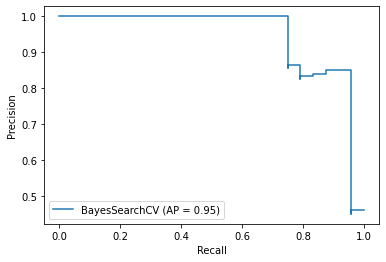

Training on 60% of data
Score for Micro Raw model is 0.9337363679468942 (0.033031392911036246) for cross validated training data.
Score for Micro Raw model is 0.9317269076305221 for test data.
Accuracy of 48 true recessions predicted: 0.6875


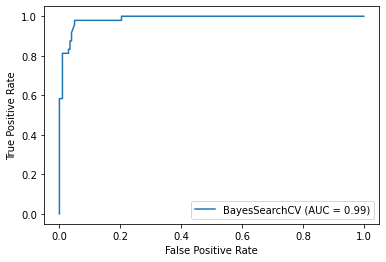

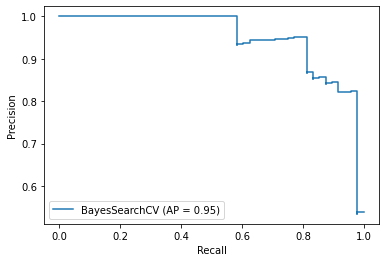

Training on 40% of data
Score for Micro Raw model is 0.904888888888889 (0.04755685356484021) for cross validated training data.
Score for Micro Raw model is 0.9490616621983914 for test data.
Accuracy of 69 true recessions predicted: 0.7536231884057971


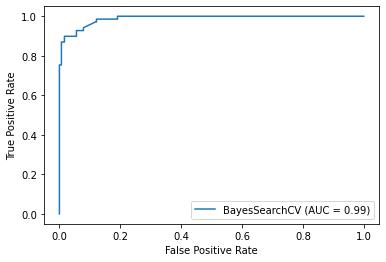

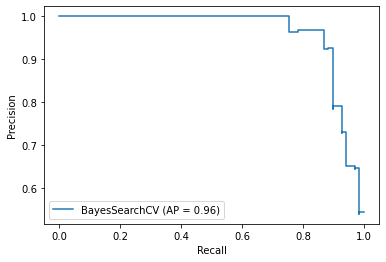

Training on 20% of data
Score for Micro Raw model is 0.8683760683760684 (0.07091442226561209) for cross validated training data.
Score for Micro Raw model is 0.8329979879275654 for test data.
Accuracy of 93 true recessions predicted: 0.10752688172043011


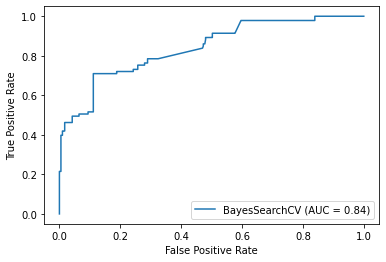

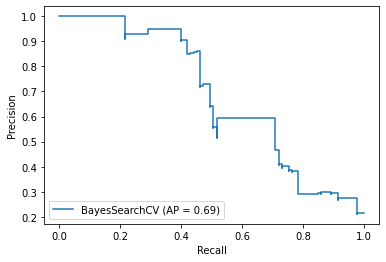

Training on 80% of data
Score for Macro Pct model is 0.8783129251700682 (0.034879174374330295) for cross validated training data.
Score for Macro Pct model is 0.864 for test data.
Accuracy of 24 true recessions predicted: 0.375


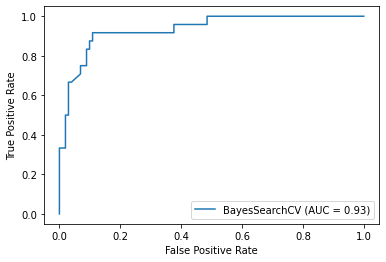

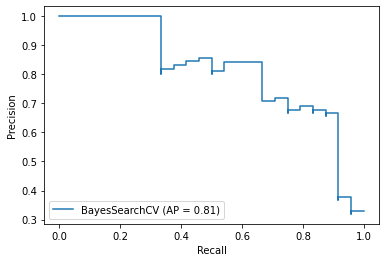

Training on 60% of data
Score for Macro Pct model is 0.8745139876718825 (0.04423786409823964) for cross validated training data.
Score for Macro Pct model is 0.891566265060241 for test data.
Accuracy of 48 true recessions predicted: 0.5


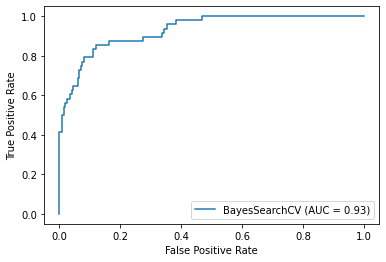

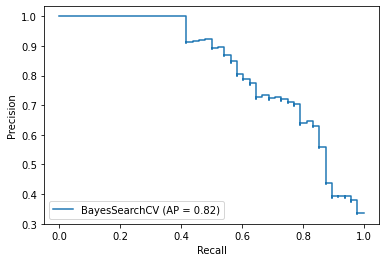

Training on 40% of data
Score for Macro Pct model is 0.8627777777777778 (0.04858237245730438) for cross validated training data.
Score for Macro Pct model is 0.8847184986595175 for test data.
Accuracy of 69 true recessions predicted: 0.463768115942029


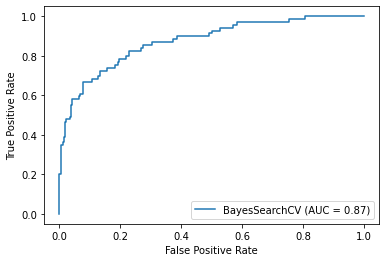

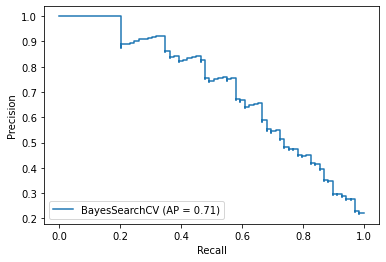

Training on 20% of data
Score for Macro Pct model is 0.8764957264957265 (0.08592188281615173) for cross validated training data.
Score for Macro Pct model is 0.8611670020120724 for test data.
Accuracy of 93 true recessions predicted: 0.45161290322580644


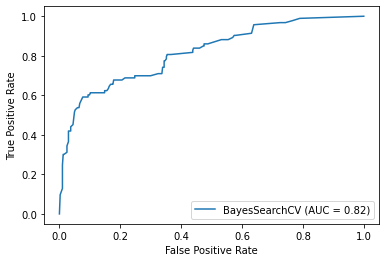

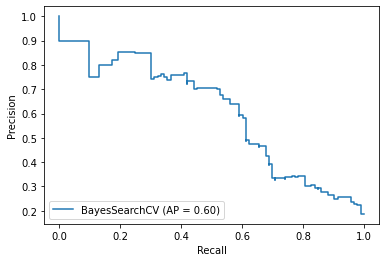

Training on 80% of data
Score for Macro Raw model is 0.9306938775510204 (0.02619153279960704) for cross validated training data.
Score for Macro Raw model is 0.912 for test data.
Accuracy of 24 true recessions predicted: 0.75


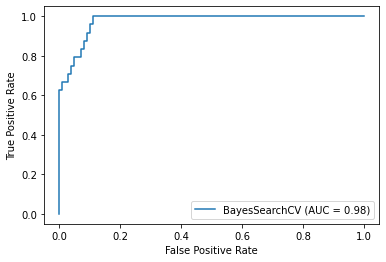

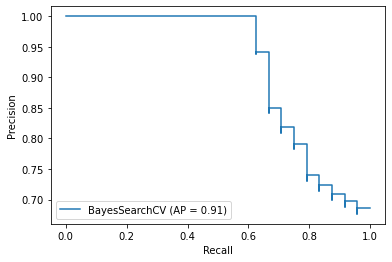

Training on 60% of data
Score for Macro Raw model is 0.9096017069701282 (0.04166757551650149) for cross validated training data.
Score for Macro Raw model is 0.927710843373494 for test data.
Accuracy of 48 true recessions predicted: 0.7291666666666666


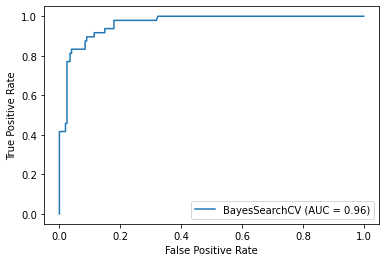

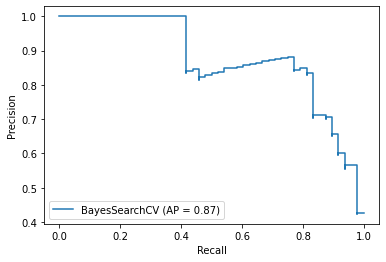

Training on 40% of data
Score for Macro Raw model is 0.8659444444444445 (0.06096247074640407) for cross validated training data.
Score for Macro Raw model is 0.8900804289544236 for test data.
Accuracy of 69 true recessions predicted: 0.4927536231884058


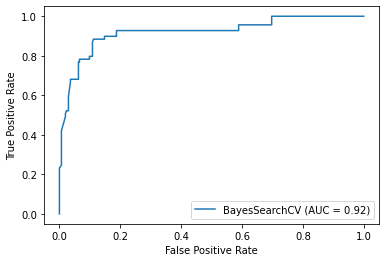

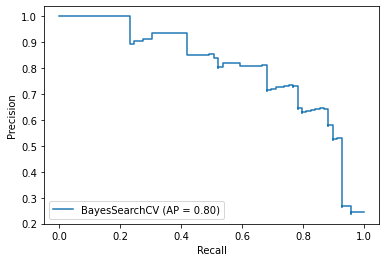

Training on 20% of data
Score for Macro Raw model is 0.818162393162393 (0.0654659150442496) for cross validated training data.
Score for Macro Raw model is 0.8128772635814889 for test data.
Accuracy of 93 true recessions predicted: 0.0


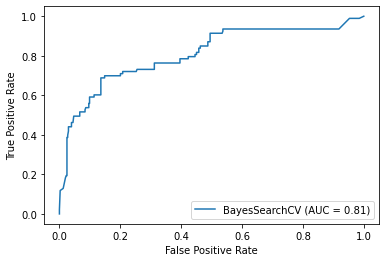

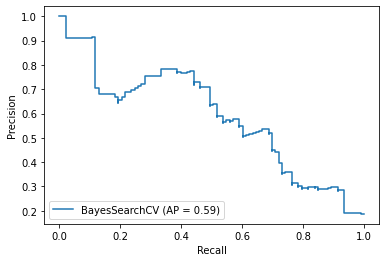

Training on 80% of data
Score for All Pct model is 0.9569115646258503 (0.026055970540635687) for cross validated training data.
Score for All Pct model is 0.984 for test data.
Accuracy of 24 true recessions predicted: 0.9166666666666666


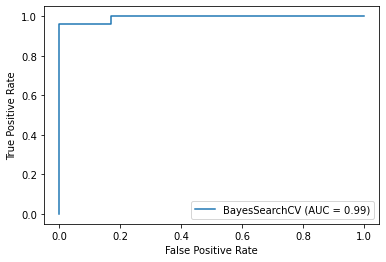

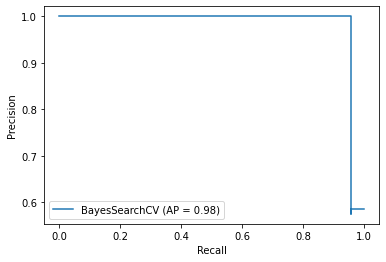

Training on 60% of data
Score for All Pct model is 0.937316263632053 (0.03347742772721111) for cross validated training data.
Score for All Pct model is 0.9759036144578314 for test data.
Accuracy of 48 true recessions predicted: 0.875


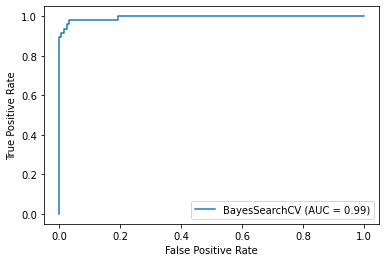

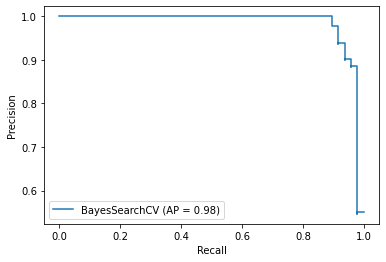

Training on 40% of data
Score for All Pct model is 0.9275555555555556 (0.037797543848610775) for cross validated training data.
Score for All Pct model is 0.9544235924932976 for test data.
Accuracy of 69 true recessions predicted: 0.7971014492753623


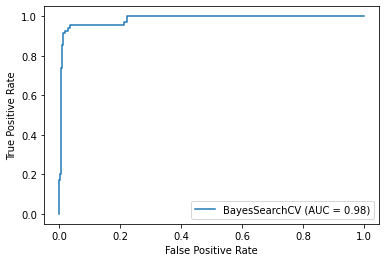

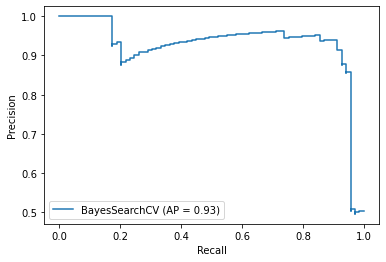

Training on 20% of data
Score for All Pct model is 0.9301282051282053 (0.0687094569954156) for cross validated training data.
Score for All Pct model is 0.9014084507042254 for test data.
Accuracy of 93 true recessions predicted: 0.5053763440860215


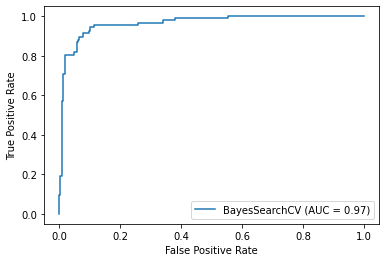

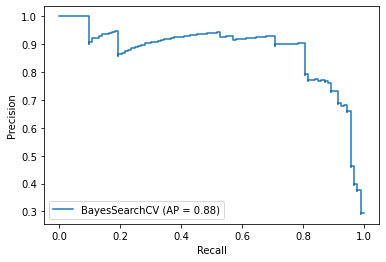

Training on 80% of data
Score for All Raw model is 0.9488163265306123 (0.028252957837091943) for cross validated training data.
Score for All Raw model is 0.944 for test data.
Accuracy of 24 true recessions predicted: 0.75


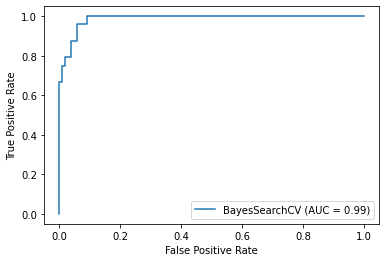

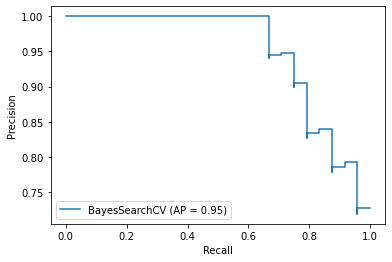

Training on 60% of data
Score for All Raw model is 0.9292081555239451 (0.04133333990405861) for cross validated training data.
Score for All Raw model is 0.9477911646586346 for test data.
Accuracy of 48 true recessions predicted: 0.75


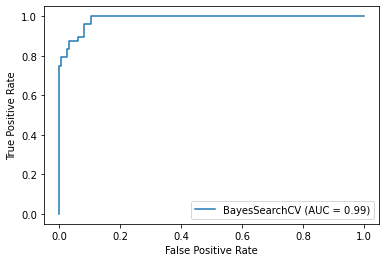

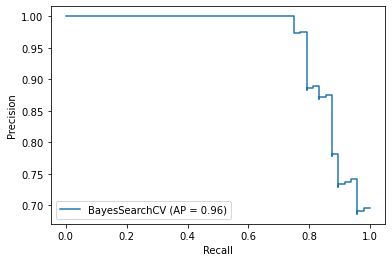

Training on 40% of data
Score for All Raw model is 0.9022222222222224 (0.04885983985460129) for cross validated training data.
Score for All Raw model is 0.9410187667560321 for test data.
Accuracy of 69 true recessions predicted: 0.6811594202898551


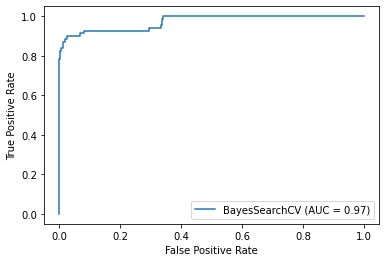

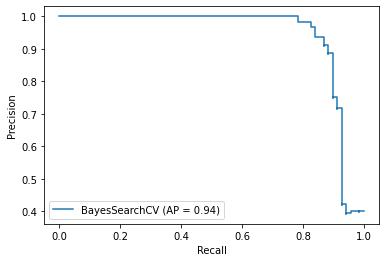

Training on 20% of data
Score for All Raw model is 0.876923076923077 (0.05281885318112947) for cross validated training data.
Score for All Raw model is 0.8430583501006036 for test data.
Accuracy of 93 true recessions predicted: 0.43010752688172044


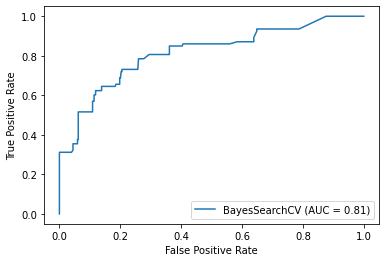

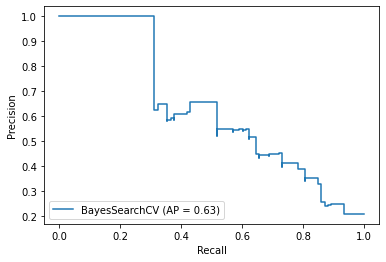

Training on 80% of data
Score for ANOVA Pct model is 0.9474149659863946 (0.02728291486732557) for cross validated training data.
Score for ANOVA Pct model is 0.984 for test data.
Accuracy of 24 true recessions predicted: 0.9583333333333334


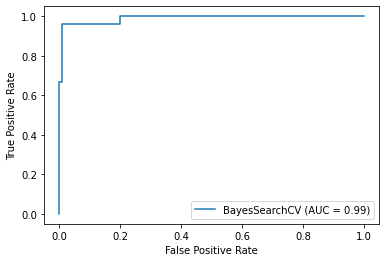

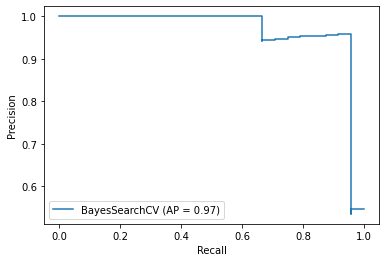

Training on 60% of data
Score for ANOVA Pct model is 0.9391417733522995 (0.034258073407339364) for cross validated training data.
Score for ANOVA Pct model is 0.9799196787148594 for test data.
Accuracy of 48 true recessions predicted: 0.8958333333333334


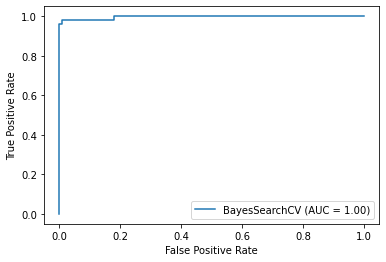

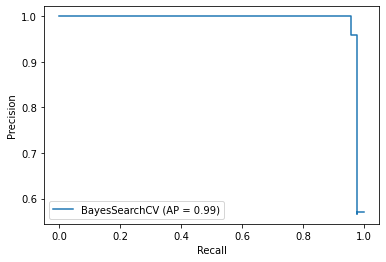

Training on 40% of data
Score for ANOVA Pct model is 0.9208333333333335 (0.04326864830250566) for cross validated training data.
Score for ANOVA Pct model is 0.935656836461126 for test data.
Accuracy of 69 true recessions predicted: 0.7246376811594203


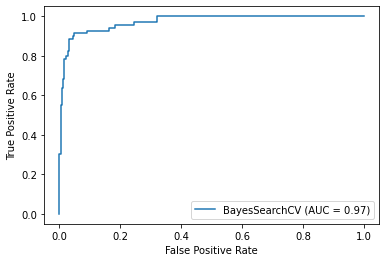

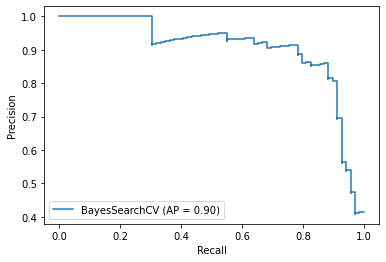

Training on 20% of data
Score for ANOVA Pct model is 0.9329059829059828 (0.06334452073699905) for cross validated training data.
Score for ANOVA Pct model is 0.9094567404426559 for test data.
Accuracy of 93 true recessions predicted: 0.5698924731182796


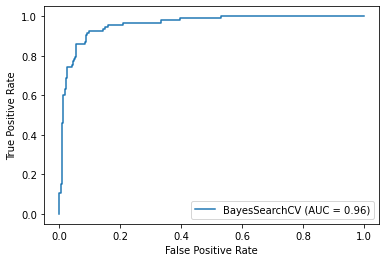

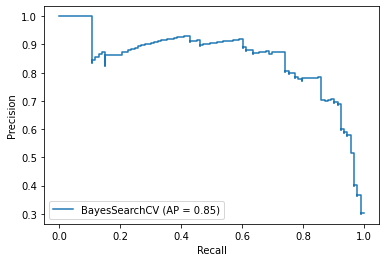

Training on 80% of data
Score for ANOVA Raw model is 0.9253061224489796 (0.03235201359362975) for cross validated training data.
Score for ANOVA Raw model is 0.904 for test data.
Accuracy of 24 true recessions predicted: 0.75


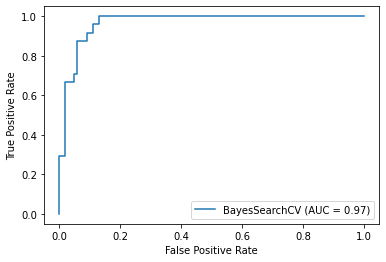

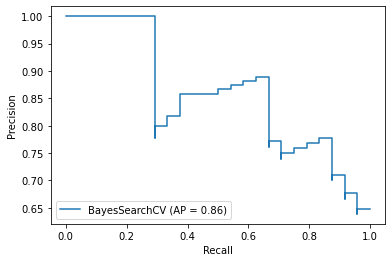

Training on 60% of data
Score for ANOVA Raw model is 0.910502607871029 (0.042603894635508094) for cross validated training data.
Score for ANOVA Raw model is 0.9036144578313253 for test data.
Accuracy of 48 true recessions predicted: 0.6666666666666666


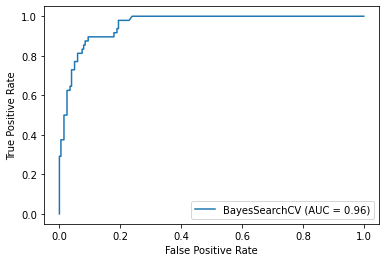

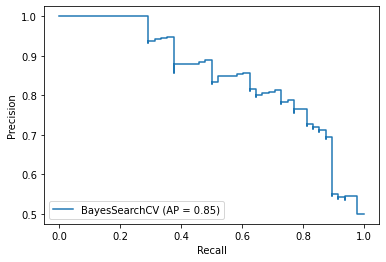

Training on 40% of data
Score for ANOVA Raw model is 0.8672777777777778 (0.05130425463068221) for cross validated training data.
Score for ANOVA Raw model is 0.8739946380697051 for test data.
Accuracy of 69 true recessions predicted: 0.463768115942029


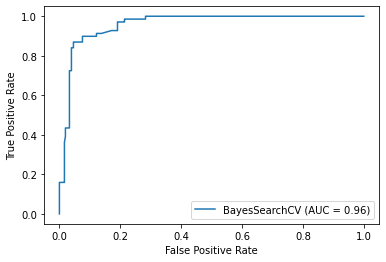

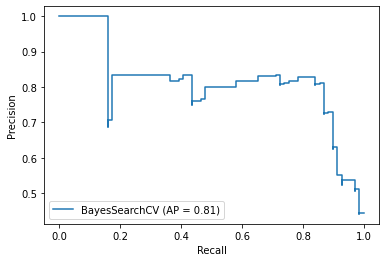

Training on 20% of data
Score for ANOVA Raw model is 0.8260683760683759 (0.06299759911566885) for cross validated training data.
Score for ANOVA Raw model is 0.8269617706237424 for test data.
Accuracy of 93 true recessions predicted: 0.1935483870967742


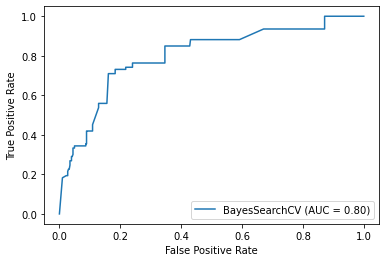

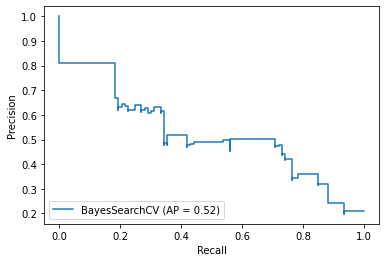

Training on 80% of data
Score for PCA Raw model is 0.9341224489795917 (0.02982080779484581) for cross validated training data.
Score for PCA Raw model is 0.96 for test data.
Accuracy of 24 true recessions predicted: 0.8333333333333334


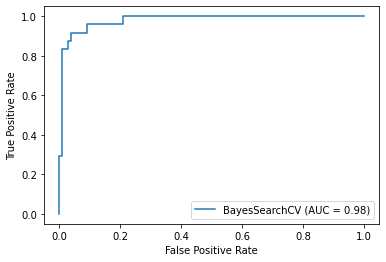

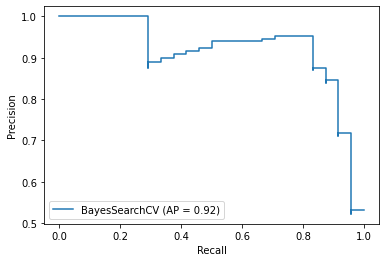

Training on 60% of data
Score for PCA Raw model is 0.9114035087719299 (0.030843272974309506) for cross validated training data.
Score for PCA Raw model is 0.927710843373494 for test data.
Accuracy of 48 true recessions predicted: 0.6458333333333334


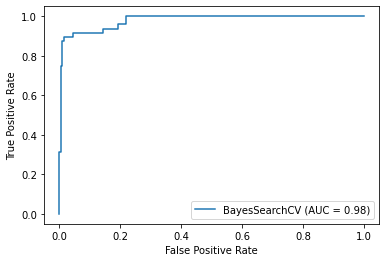

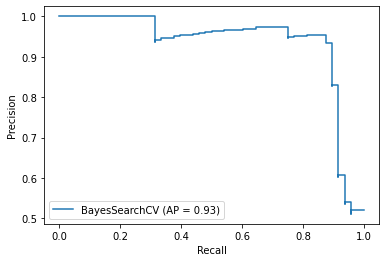

Training on 40% of data
Score for PCA Raw model is 0.8913333333333333 (0.0357574131138229) for cross validated training data.
Score for PCA Raw model is 0.9276139410187667 for test data.
Accuracy of 69 true recessions predicted: 0.6231884057971014


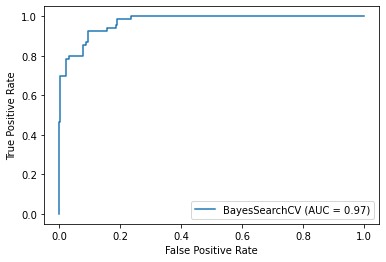

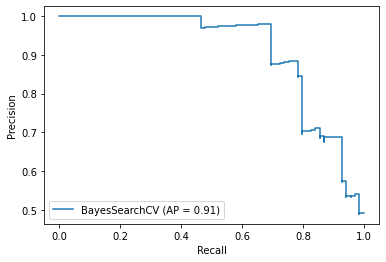

Training on 20% of data
Score for PCA Raw model is 0.8335470085470085 (0.053567741090403714) for cross validated training data.
Score for PCA Raw model is 0.8350100603621731 for test data.
Accuracy of 93 true recessions predicted: 0.26881720430107525


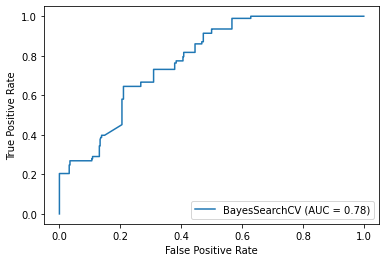

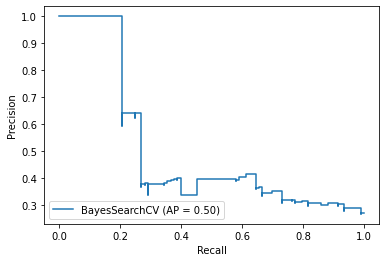

Training on 80% of data
Score for PCA Pct model is 0.8607891156462583 (0.03644251656076324) for cross validated training data.
Score for PCA Pct model is 0.856 for test data.
Accuracy of 24 true recessions predicted: 0.3333333333333333


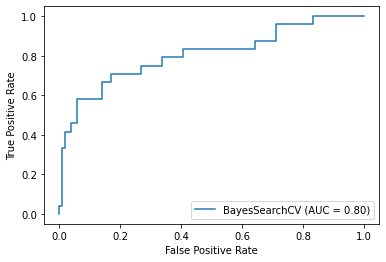

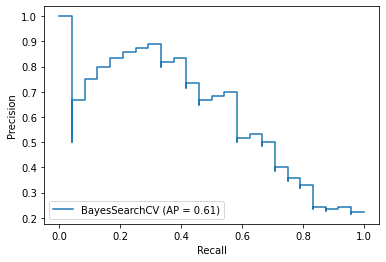

Training on 60% of data
Score for PCA Pct model is 0.8657183499288761 (0.04050866789657093) for cross validated training data.
Score for PCA Pct model is 0.8554216867469879 for test data.
Accuracy of 48 true recessions predicted: 0.3541666666666667


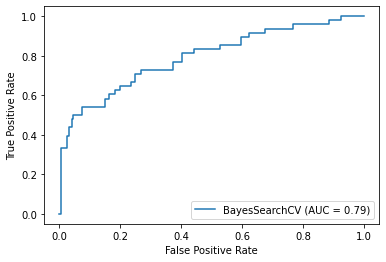

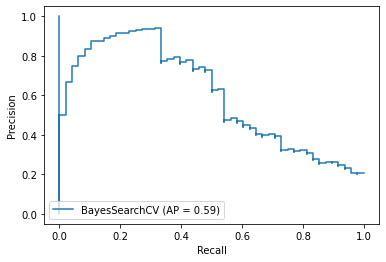

Training on 40% of data
Score for PCA Pct model is 0.8588333333333334 (0.04495913782618695) for cross validated training data.
Score for PCA Pct model is 0.8364611260053619 for test data.
Accuracy of 69 true recessions predicted: 0.2753623188405797


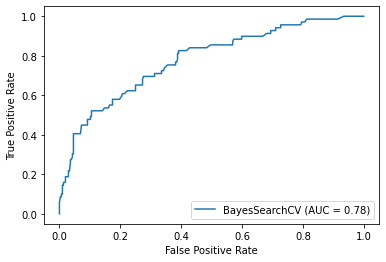

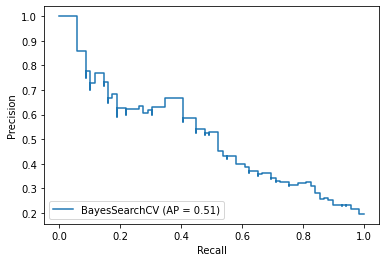

Training on 20% of data
Score for PCA Pct model is 0.8634615384615384 (0.08317127569151148) for cross validated training data.
Score for PCA Pct model is 0.8631790744466801 for test data.
Accuracy of 93 true recessions predicted: 0.40860215053763443


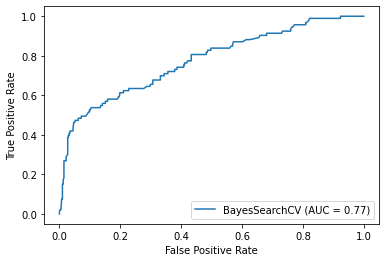

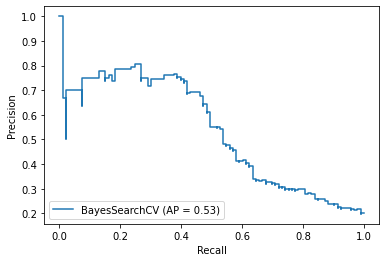

Training on 80% of data
Score for Corr Pct model is 0.9541224489795918 (0.034557330330194584) for cross validated training data.
Score for Corr Pct model is 0.976 for test data.
Accuracy of 24 true recessions predicted: 0.875


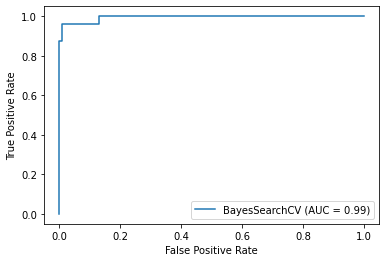

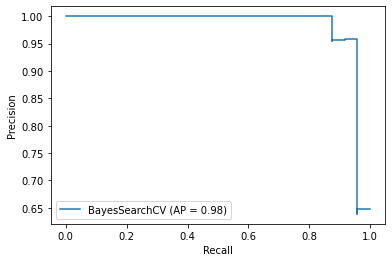

Training on 60% of data
Score for Corr Pct model is 0.9481270744428639 (0.029103978186845212) for cross validated training data.
Score for Corr Pct model is 0.9839357429718876 for test data.
Accuracy of 48 true recessions predicted: 0.9166666666666666


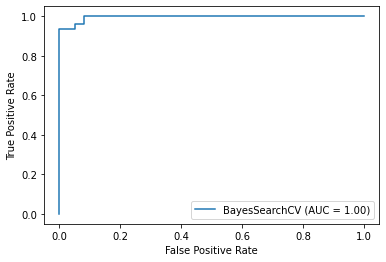

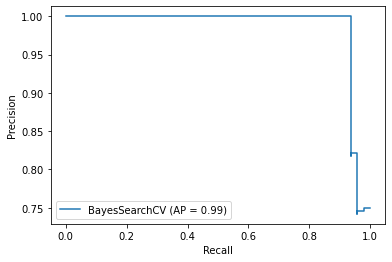

Training on 40% of data
Score for Corr Pct model is 0.9343333333333332 (0.03638935538293011) for cross validated training data.
Score for Corr Pct model is 0.9651474530831099 for test data.
Accuracy of 69 true recessions predicted: 0.8405797101449275


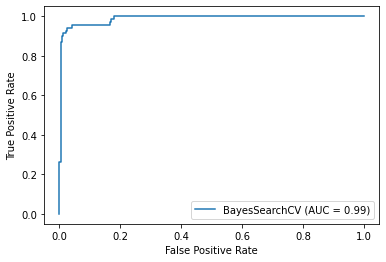

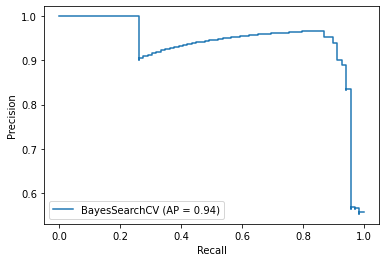

Training on 20% of data
Score for Corr Pct model is 0.9354700854700855 (0.06074392106403901) for cross validated training data.
Score for Corr Pct model is 0.9114688128772636 for test data.
Accuracy of 93 true recessions predicted: 0.5806451612903226


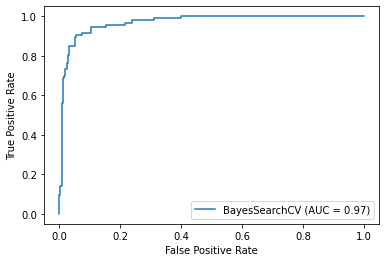

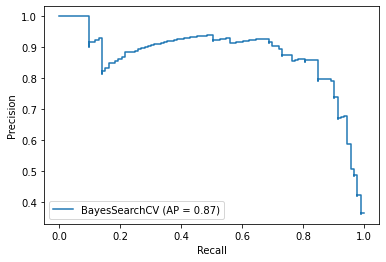

Training on 80% of data
Score for Corr Raw model is 0.9266802721088435 (0.027902864640623276) for cross validated training data.
Score for Corr Raw model is 0.912 for test data.
Accuracy of 24 true recessions predicted: 0.75


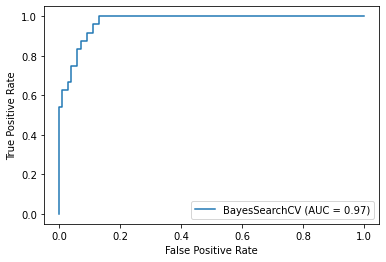

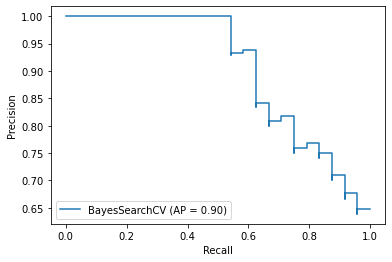

Training on 60% of data
Score for Corr Raw model is 0.912304409672831 (0.037052746150053) for cross validated training data.
Score for Corr Raw model is 0.9156626506024096 for test data.
Accuracy of 48 true recessions predicted: 0.7083333333333334


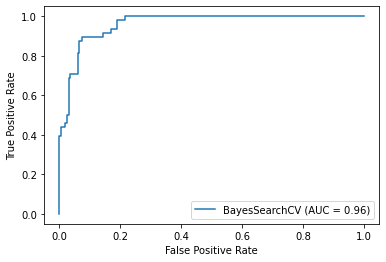

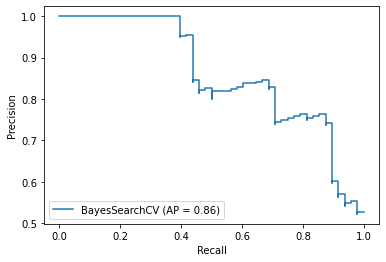

Training on 40% of data
Score for Corr Raw model is 0.8726666666666668 (0.05434389808671493) for cross validated training data.
Score for Corr Raw model is 0.8900804289544236 for test data.
Accuracy of 69 true recessions predicted: 0.5072463768115942


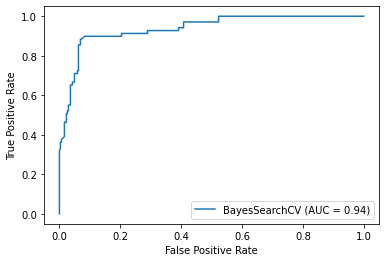

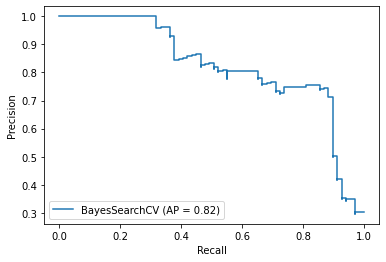

Training on 20% of data
Score for Corr Raw model is 0.8202991452991453 (0.055624956651391076) for cross validated training data.
Score for Corr Raw model is 0.8350100603621731 for test data.
Accuracy of 93 true recessions predicted: 0.17204301075268819


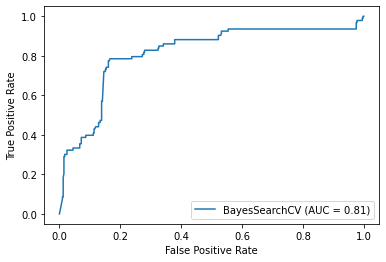

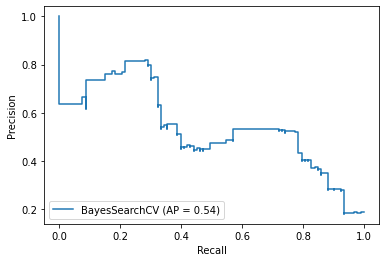

In [239]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV # pip3 install scikit-optimize
from skopt.space import Integer
from random import randint
import time

def randomForestModels(X_train, X_test, y_train, y_test, name):
    
    total_size = X_train.size + X_test.size
    
    percent = math.ceil(X_train.size/total_size * 100)
    
    print(f'Training on {percent}% of data')
    
    start = time.time()
    opt=BayesSearchCV(
        RandomForestClassifier(),
        {
            'n_estimators': Integer(5, 100), 
            'min_samples_leaf': Integer(1, 10), 
            'min_samples_split': Integer(2, 10)
        },
        n_iter=7,
        random_state=1
    )
    accuracy=cross_val_score(opt, X_train, y_train, scoring="accuracy", cv=cross)
    opt.fit(X_train, y_train)
    print(f'Score for {name} model is {np.mean(accuracy)} ({np.std(accuracy)}) for cross validated training data.')
    print(f'Score for {name} model is {opt.score(X_test, y_test)} for test data.')
    cm = confusion_matrix(y_test, opt.predict(X_test))
    correct = cm[1][1]
    total = correct + cm[1][0]
    acc = correct/total
    print(f'Accuracy of {total} true recessions predicted: {acc}')
    plot_roc_curve(opt, X_test, y_test)
    plot_precision_recall_curve(opt, X_test, y_test)
    plt.show()
    data_sub, fsm = name.split()
    perf = time.time() - start
    performancerf.append([perf])
    accuracyrf.append([acc])
    train_scorelr.append([np.mean(accuracy)])
    test_scorelr.append([opt.score(X_test, y_test)])
    
    model_scores_data.append(["Random Forest Classifier", percent, data_sub, fsm, cm[1][1], cm[0][1], cm[0][0], cm[1][0], np.mean(accuracy), np.std(accuracy), correct/total, perf])

for i in all_train_test:
    randomForestModels(*i)

# Reporting

In [240]:
model_scores=pd.DataFrame(model_scores_data[1:], columns=model_scores_data[0])

model_scores.sort_values(by=[model_scores_data[0][-2]], ascending=False)

#model_scores.to_csv('Model_Scores.csv')

,Model,Training Percent,Data Subset,Feature Selection Method,True Positive,False Positive,True Negative,False Negative,Cross Validation Mean,Cross Validation STD,Test Accuracy,Time
72,Random Forest Classifier,80,ANOVA,Pct,23,1,100,1,0.947415,0.027283,0.958333,61.558577
64,Random Forest Classifier,80,All,Pct,22,0,101,2,0.956912,0.026056,0.916667,57.819560
89,Random Forest Classifier,60,Corr,Pct,44,0,201,4,0.948127,0.029104,0.916667,62.251654
73,Random Forest Classifier,60,ANOVA,Pct,43,0,201,5,0.939142,0.034258,0.895833,55.340415
65,Random Forest Classifier,60,All,Pct,42,0,201,6,0.937316,0.033477,0.875000,52.288401
...,...,...,...,...,...,...,...,...,...,...,...,...
6,Logistic Regression,40,Micro,Raw,0,0,304,69,0.818667,0.018809,0.000000,2.779625
5,Logistic Regression,60,Micro,Raw,0,0,201,48,0.822617,0.012560,0.000000,4.946942
4,Logistic Regression,80,Micro,Raw,0,0,101,24,0.818531,0.001800,0.000000,4.515939
35,Logistic Regression,20,PCA,Raw,0,0,404,93,0.819658,0.046098,0.000000,2.645871


# Graphs

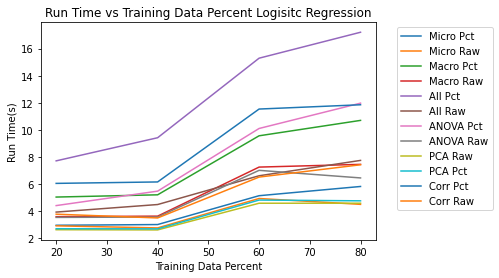

In [241]:
# perf8020 = []
# perf6040 = []
# perf4060 = []
# perf2080 = []

sizes = [80, 60, 40, 20]

test = performancelr

perf8020lr = test[0::4]
perf6040lr = test[1::4]
perf4060lr = test[2::4]
perf2080lr = test[3::4]



i = 0
for model, name in all_models:
    plt.plot(sizes, [perf8020lr[i], perf6040lr[i], perf4060lr[i], perf2080lr[i]], label=name)
    i += 1
plt.title("Run Time vs Training Data Percent Logisitc Regression")
plt.xlabel("Training Data Percent")
plt.ylabel("Run Time(s)")
plt.legend(bbox_to_anchor = (1.05, 1))    
# plt.savefig("lrrun.png", bbox_inches = 'tight')
plt.show()



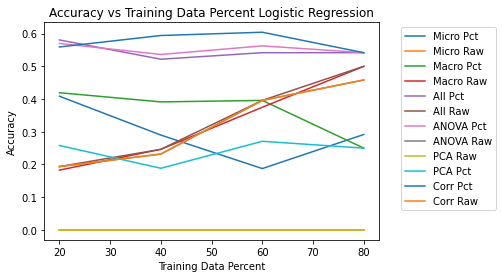

In [242]:
sizes = [80, 60, 40, 20]

acc8020lr = accuracylr[0::4]
acc6040lr = accuracylr[1::4]
acc4060lr = accuracylr[2::4]

acc2080lr = accuracylr[3::4]



i = 0
for model, name in all_models:
    plt.plot(sizes, [acc8020lr[i], acc6040lr[i], acc4060lr[i], acc2080lr[i]], label=name)
    i += 1
plt.title("Accuracy vs Training Data Percent Logistic Regression")
plt.xlabel("Training Data Percent")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor = (1.05, 1))  
# plt.savefig("lracc.png", bbox_inches = 'tight')
plt.show()

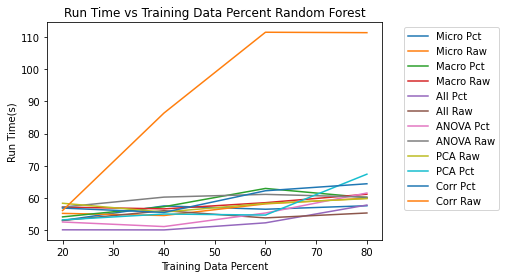

In [243]:
perf8020 = performancerf[0::4]
perf6040 = performancerf[1::4]
perf4060 = performancerf[2::4]
perf2080 = performancerf[3::4]



i = 0
for model, name in all_models:
    plt.plot(sizes, [perf8020[i], perf6040[i], perf4060[i], perf2080[i]], label=name)
    i += 1
plt.title("Run Time vs Training Data Percent Random Forest")
plt.xlabel("Training Data Percent")
plt.ylabel("Run Time(s)")
plt.legend(bbox_to_anchor = (1.05, 1))   
# plt.savefig("rfrun.png", bbox_inches = 'tight')
plt.show()

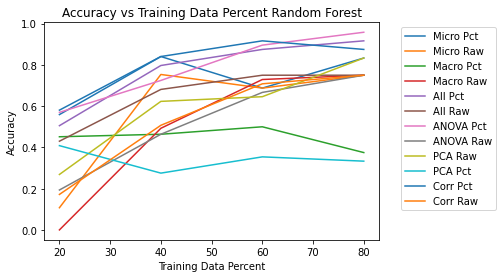

In [244]:
sizes = [80, 60, 40, 20]

acc8020 = accuracyrf[0::4]
acc6040 = accuracyrf[1::4]
acc4060 = accuracyrf[2::4]
acc2080 = accuracyrf[3::4]



i = 0
for model, name in all_models:
    plt.plot(sizes, [acc8020[i], acc6040[i], acc4060[i], acc2080[i]], label=name)
    i += 1
plt.title("Accuracy vs Training Data Percent Random Forest")
plt.xlabel("Training Data Percent")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor = (1.05, 1))    
# plt.savefig("rfacc.png", bbox_inches = 'tight')
plt.show()

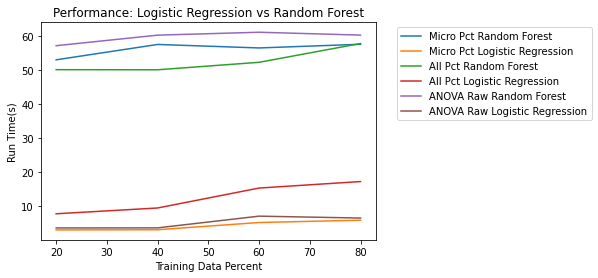

In [245]:
i=0
for model, name in all_models:
    if name == "Micro Pct" or name =="All Pct" or name == "ANOVA Raw":
        plt.plot(sizes, [perf8020[i], perf6040[i], perf4060[i], perf2080[i]], label=name + " Random Forest")
        plt.plot(sizes, [perf8020lr[i], perf6040lr[i], perf4060lr[i], perf2080lr[i]], label=name + " Logistic Regression")
    i += 1

plt.title("Performance: Logistic Regression vs Random Forest")
plt.xlabel("Training Data Percent")
plt.ylabel("Run Time(s)")
plt.legend(bbox_to_anchor = (1.05, 1))    
#plt.savefig("comprun.png", bbox_inches = 'tight')
plt.show()

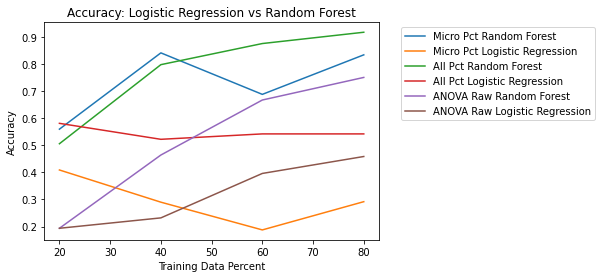

In [246]:
i=0
for model, name in all_models:
    if name == "Micro Pct" or name =="All Pct" or name == "ANOVA Raw":
        plt.plot(sizes, [acc8020[i], acc6040[i], acc4060[i], acc2080[i]], label=name + " Random Forest")
        plt.plot(sizes, [acc8020lr[i], acc6040lr[i], acc4060lr[i], acc2080lr[i]], label=name + " Logistic Regression")
    i += 1

plt.title("Accuracy: Logistic Regression vs Random Forest")
plt.xlabel("Training Data Percent")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor = (1.05, 1))    
#plt.savefig("compacc.png", bbox_inches = 'tight')
plt.show()

# Parallelism

In [249]:
#smol
# Accuracy for training data: 0.8288770053475936
# Accuracy for testing data: 0.5374331550802139
# 12.149142503738403

# Accuracy for training data: 0.9545454545454546
# Accuracy for testing data: 0.6229946524064172
# 61.67491793632507

#Big

# Accuracy for training data: 0.8288770053475936
# Accuracy for testing data: 0.5374331550802139
# 7.096116781234741

# Accuracy for training data: 0.9545454545454546
# Accuracy for testing data: 0.6229946524064172
# 50.77190136909485

#Biggest

# Accuracy for training data: 0.8288770053475936
# Accuracy for testing data: 0.5374331550802139
# 6.738395690917969

# Accuracy for training data: 0.9545454545454546
# Accuracy for testing data: 0.6229946524064172
# 47.681203842163086

anovaraw_timeslr = [12.149142503738403, 7.096116781234741, 6.738395690917969]
anovaraw_timesrf = [61.67491793632507, 50.77190136909485, 47.681203842163086]

#smol

# Accuracy for training data: 0.8475935828877005
# Accuracy for testing data: 0.5267379679144385
# 8.698838472366333

# Accuracy for training data: 0.9919786096256684
# Accuracy for testing data: 0.6497326203208557
# 57.29623770713806

#Big
# Accuracy for training data: 0.8475935828877005
# Accuracy for testing data: 0.5267379679144385
# 8.11802077293396

# Accuracy for training data: 0.9919786096256684
# Accuracy for testing data: 0.6497326203208557
# 51.411972522735596


#Biggest

# Accuracy for training data: 0.8475935828877005
# Accuracy for testing data: 0.5267379679144385
# 6.850462913513184

# Accuracy for training data: 0.9919786096256684
# Accuracy for testing data: 0.6497326203208557
# 45.78377866744995

corrpct_timeslr = [8.698838472366333, 8.11802077293396, 6.850462913513184]
corrpct_timesrf = [57.29623770713806, 51.411972522735596, 45.78377866744995]

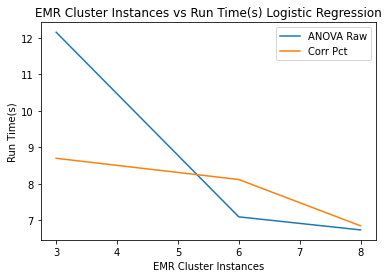

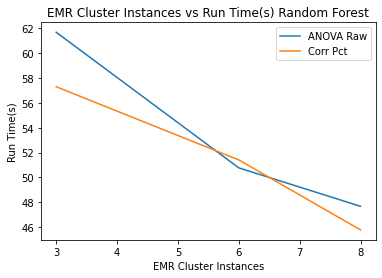

In [254]:
cluster_count = [3, 6, 8]

plt.plot(cluster_count, anovaraw_timeslr, label="ANOVA Raw")
plt.plot(cluster_count, corrpct_timeslr, label="Corr Pct")
plt.title("EMR Cluster Instances vs Run Time(s) Logistic Regression")
plt.xlabel("EMR Cluster Instances")
plt.ylabel("Run Time(s)")
plt.legend()
plt.savefig("parallellr.png")
plt.show()

plt.plot(cluster_count, anovaraw_timesrf, label="ANOVA Raw")
plt.plot(cluster_count, corrpct_timesrf, label="Corr Pct")
plt.title("EMR Cluster Instances vs Run Time(s) Random Forest")
plt.xlabel("EMR Cluster Instances")
plt.ylabel("Run Time(s)")
plt.legend()
plt.savefig("parallelrf.png")
plt.show()